# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [206]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


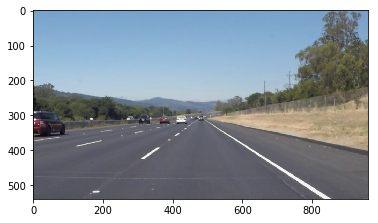

In [207]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#imshape = [image.shape[0], image.shape[1]]

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [223]:
import math
min_line_len = 40 

def line_fit(slope_int):

    # Initialise arrays
    slopeArr = []
    intArr = []
    if len(slope_int) == 1:
        return slope_int[0][0], slope_int[0][1]

    # Add all slopes and intercepts to arrays
    slopes = [pair[0] for pair in slope_int]
    #mean_slope = np.mean(slopes)
    #slope_std = np.std(slopes)
    for pair in slope_int:
        slope = pair[0]
        slopeArr.append(slope)
        intArr.append(pair[1])
    if not slopeArr:
        slopeArr = slopes
        intArr = [pair[1] for pair in slope_int]
    
    # Take estimate of slope, intercept to be the mean of remaining values
    slope = np.mean(slopeArr)
    intercept = np.mean(intArr)
    return slope, intercept

def draw_linear_regression_line(coef, intercept, intersection, img, imshape=[image.shape[0], image.shape[1]], color=[255, 0, 0], thickness=2):
    # ignore points that are nan
    if (math.isnan(intersection) or math.isnan(coef) or math.isnan(intercept)):
        pass
    else:
        point_one = (int(intersection), int(intersection * coef + intercept))
        if coef > 0:
            point_two = (imshape[1], int(imshape[1] * coef + intercept))
        elif coef < 0:
            point_two = (0, int(0 * coef + intercept))
        print("Point one: ", point_one, "Point two: ", point_two)
    
        # Draw line using cv2.line
        cv2.line(img, point_one, point_two, color, thickness)

In [224]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    # dynamically find the dimensons of the image
    imshape = [image.shape[0], image.shape[1]]
    
    # find slope and intercept of each line
    # first initialize arrays to hold all information
    pos_slope_int = []
    neg_slope_int = []
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            slope = (y1-y2)/(x1-x2)
            # find hypotenuse to determine segment length
            hyp = math.sqrt((x1-x2)**2 + (y1-y2)**2)
            print("Hyp: " + str(hyp))
            
            # constrain segments to the size of the min segment length defined below
            if not math.isnan(slope) and hyp > min_line_len:
                # if slop is > 0, add to pos_slope arrays
                if slope > 0:
                    # intercept from y = mx + b
                    pos_slope_int.append([slope, y1-slope*x1])
                else:
                    # intercept from y = mx + b
                    neg_slope_int.append([slope, y1-slope*x1])

    print("NegSlope: " + str(neg_slope_int))
    print("PosSlope: " + str(pos_slope_int))
    
    # Get intercept and coefficient of fitted lines
    pos_coef, pos_int = line_fit(pos_slope_int)
    neg_coef, neg_int = line_fit(neg_slope_int)
    
    # Get intersection point
    intersection = (neg_int - pos_int)/(pos_coef - neg_coef)
    
    # Plot lines
    draw_linear_regression_line(pos_coef, pos_int, intersection, img)
    draw_linear_regression_line(neg_coef, neg_int, intersection, img)
    
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [225]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

Hyp: 303.9161068452937
Hyp: 338.2454729926182
Hyp: 81.05553651663777
Hyp: 275.98007174431996
Hyp: 98.60020283954795
Hyp: 98.812954616285
Hyp: 81.21576201698781
Hyp: 95.2102935611481
Hyp: 66.40030120413611
Hyp: 64.4980619863884
NegSlope: [[-0.80952380952380953, 697.76190476190482], [-0.74683544303797467, 668.78481012658222], [-0.72499999999999998, 662.02499999999998], [-0.78125, 679.53125], [-0.72727272727272729, 658.5454545454545], [-0.75471698113207553, 675.58490566037744]]
PosSlope: [[0.55263157894736847, 41.736842105263122], [0.57679180887372017, 32.153583617747415], [0.57740585774058573, 31.3305439330544], [0.5714285714285714, 37.571428571428612]]
Point one:  (480, 309) Point two:  (960, 582)
Point one:  (480, 309) Point two:  (0, 673)
Hyp: 330.1893396219811
Hyp: 252.9584946191766
Hyp: 68.79680225126747
Hyp: 88.81441324469807
Hyp: 52.43090691567332
Hyp: 55.47071299343465
Hyp: 74.4043009509531
Hyp: 52.15361924162119
Hyp: 53.0
Hyp: 59.36328831862332
Hyp: 68.60029154456998
Hyp: 78.230

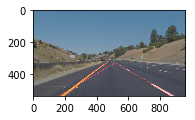

In [226]:
# TODO: Build your pipeline that will draw lane lines on the test_images
savedImages = "final_images/"
# get array of all images so we don't need to go image by image in directory
def all_files(filePath):
    return mpimg.imread(filePath)
test_images = [all_files('test_images/' + i) for i in os.listdir('test_images/')]

def find_lane_lines(image):
    imshape = image.shape
    
    # Step 1: Grayscale the image
    grayscaled_image = grayscale(image)
    #plt.subplot(2,2,1)
    #plt.imshow(grayscaled_image, cmap="gray")
    
    # Step 2: Gaussian Blur
    blur_image = gaussian_blur(grayscaled_image, 5)
    
    # Step 3: Canny edge detection
    image_edges = canny(blur_image, 50, 150)
    
    # Step 4: Mask edges
    vertices = np.array([[(0,imshape[0]),(465, 320), (475, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(image_edges, vertices)
    bw_masked_edges = cv2.cvtColor(masked_edges, cv2.COLOR_GRAY2BGR)
    plt.subplot(2,2,2)
    plt.imshow(bw_masked_edges)
    
     # Step 5: Hough lines
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180
    threshold = 10     
    max_line_gap = 25   
    lines_image = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    
    # Combine lines image with original image
    final_image = weighted_img(lines_image, image)
    plt.imshow(final_image)

    if not os.path.exists(savedImages):
        os.mkdir(savedImages)
    #mpimg.imsave(saveDirectory, final_image)
    saveDirectory = savedImages+'test_image_'+str(n)+".jpg"
    plt.imsave(saveDirectory, final_image)
    return final_image
    plt.imshow(final_image)

for n in range(len(test_images)):
    find_lane_lines(test_images[n])

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

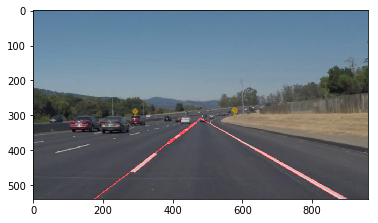

In [227]:
#reading in an image
image = mpimg.imread('final_images/test_image_0.jpg')
plt.imshow(image)

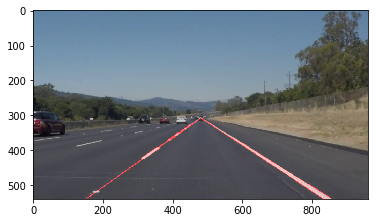

In [228]:
#reading in an image
image = mpimg.imread('final_images/test_image_1.jpg')
plt.imshow(image)

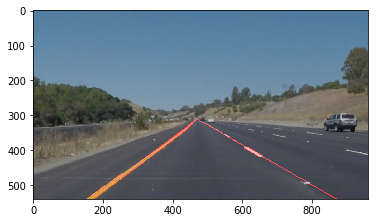

In [229]:
#reading in an image
image = mpimg.imread('final_images/test_image_2.jpg')
plt.imshow(image)

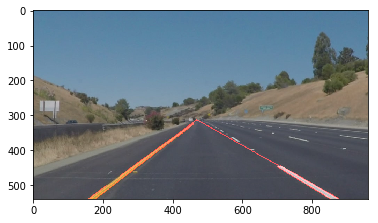

In [230]:
#reading in an image
image = mpimg.imread('final_images/test_image_3.jpg')
plt.imshow(image)

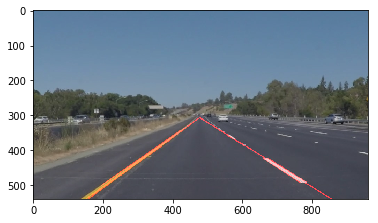

In [231]:
#reading in an image
image = mpimg.imread('final_images/test_image_4.jpg')
plt.imshow(image)

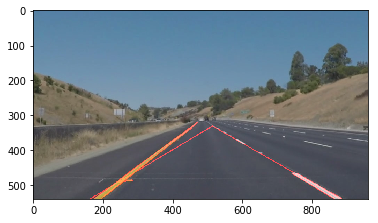

In [232]:
#reading in an image
image = mpimg.imread('final_images/test_image_5.jpg')
plt.imshow(image)

In [233]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [234]:
def fake_pipeline(image):
    return image

In [235]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    imshape = image.shape
    
    # Step 2: Gaussian Blur
    blur_image = gaussian_blur(image, 5)
    
    # Step 3: Canny edge detection
    image_edges = canny(blur_image, 50, 150)
    
    # Step 4: Mask edges
    vertices = np.array([[(0,imshape[0]),(465, 320), (475, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(image_edges, vertices)
    
    # Step 5: Hough lines
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180
    threshold = 10     
    max_line_gap = 25   
    lines_image = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    
    # Combine lines image with original image
    final_image = weighted_img(lines_image, image)
    
    return final_image

Let's try the one with the solid white lane on the right first ...

In [236]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
#white_clip = clip1.f1_image(fake_pipeline)
%time white_clip.write_videofile(white_output, audio=False)

Hyp: 254.33245958783948
Hyp: 232.16588896735024
Hyp: 138.2208377922808
Hyp: 103.60019305001319
Hyp: 76.66159403508382
Hyp: 57.62811813689564
Hyp: 219.12781658201223
Hyp: 141.8238343861849
Hyp: 48.373546489791295
Hyp: 52.80151512977634
Hyp: 55.31726674375732
Hyp: 76.60939890117922
Hyp: 53.600373133029585
Hyp: 103.81233067415451
NegSlope: [[-0.7232142857142857, 647.24107142857144], [-0.74698795180722888, 662.15662650602417], [-0.80000000000000004, 678.60000000000002], [-0.72173913043478266, 647.96521739130435], [-0.76190476190476186, 664.61904761904759], [-0.8571428571428571, 694.85714285714289], [-0.72580645161290325, 654.9677419354839], [-0.7441860465116279, 658.48837209302326], [-0.72619047619047616, 653.88095238095229]]
PosSlope: [[0.6009174311926605, 15.80275229357801], [0.64615384615384619, -7.2923076923077019], [0.59090909090909094, 21.772727272727252], [0.64673913043478259, -8.7880434782608745], [0.5714285714285714, 33.571428571428612]]
Point one:  (476, 302) Point two:  (960, 59


  4%|▍         | 9/222 [00:00<00:02, 81.83it/s]

Hyp: 254.33245958783948
Hyp: 232.16588896735024
Hyp: 138.2208377922808
Hyp: 103.60019305001319
Hyp: 76.66159403508382
Hyp: 57.62811813689564
Hyp: 219.12781658201223
Hyp: 141.8238343861849
Hyp: 48.373546489791295
Hyp: 52.80151512977634
Hyp: 55.31726674375732
Hyp: 76.60939890117922
Hyp: 53.600373133029585
Hyp: 103.81233067415451
NegSlope: [[-0.7232142857142857, 647.24107142857144], [-0.74698795180722888, 662.15662650602417], [-0.80000000000000004, 678.60000000000002], [-0.72173913043478266, 647.96521739130435], [-0.76190476190476186, 664.61904761904759], [-0.8571428571428571, 694.85714285714289], [-0.72580645161290325, 654.9677419354839], [-0.7441860465116279, 658.48837209302326], [-0.72619047619047616, 653.88095238095229]]
PosSlope: [[0.6009174311926605, 15.80275229357801], [0.64615384615384619, -7.2923076923077019], [0.59090909090909094, 21.772727272727252], [0.64673913043478259, -8.7880434782608745], [0.5714285714285714, 33.571428571428612]]
Point one:  (476, 302) Point two:  (960, 59

Hyp: 220.51077071199947
Hyp: 48.877397639399746
Hyp: 49.92995093127971
Hyp: 80.2122185206219
Hyp: 119.20151005754919
Hyp: 90.21086409075129
Hyp: 121.40016474453401
Hyp: 88.20430828479978
Hyp: 53.009433122794285
Hyp: 54.644304369257
Hyp: 74.63243262818116
Hyp: 63.00793600809346
Hyp: 50.21951811795888
Hyp: 55.758407437802596
NegSlope: [[-0.69523809523809521, 636.02857142857147], [-0.72307692307692306, 651.04615384615386], [-0.75789473684210529, 661.77894736842109], [-0.75257731958762886, 659.1649484536083], [-0.72093023255813948, 646.39534883720921], [-0.68888888888888888, 636.20000000000005], [-0.70491803278688525, 645.27868852459017], [-0.72549019607843135, 649.05882352941171], [-0.70731707317073167, 639.70731707317077], [-0.63829787234042556, 615.40425531914889]]
PosSlope: [[0.61194029850746268, 14.567164179104509], [0.60606060606060608, 18.121212121212125], [0.64864864864864868, -3.6216216216216708], [0.59523809523809523, 24.142857142857167], [0.6428571428571429, -1.1428571428571672]

Hyp: 204.68512403201166
Hyp: 310.47383142545203
Hyp: 68.24221567329127
Hyp: 83.81527307120105
Hyp: 222.71281956816046
Hyp: 82.41965784932621
Hyp: 79.63039620647382
Hyp: 71.84705978674423
Hyp: 68.00735254367721
Hyp: 81.60882305241266
Hyp: 71.84705978674423
Hyp: 53.823786563191554
NegSlope: [[-0.6964285714285714, 634.28571428571422], [-0.72058823529411764, 649.22058823529414], [-0.71641791044776115, 637.8656716417911], [-0.70769230769230773, 649.10769230769233], [-0.69491525423728817, 635.72881355932202], [-0.72727272727272729, 639.09090909090912], [-0.72727272727272729, 651.27272727272725], [-0.69491525423728817, 636.42372881355936], [-0.70454545454545459, 638.43181818181824]]
PosSlope: [[0.6705882352941176, -21.176470588235247], [0.62737642585551334, 0.71102661596955841], [0.67027027027027031, -20.064864864864887]]
Point one:  (479, 300) Point two:  (960, 616)
Point one:  (479, 300) Point two:  (0, 641)
Hyp: 306.86967917994116
Hyp: 208.290662296705
Hyp: 70.45565981523414
Hyp: 139.28388


 12%|█▏        | 27/222 [00:00<00:02, 82.87it/s]

(481, 301) Point two:  (0, 636)
Hyp: 226.3183598385248
Hyp: 309.0954545120326
Hyp: 107.07474025184464
Hyp: 65.45991139621256
Hyp: 87.92041856133307
Hyp: 51.03920062069938
Hyp: 57.48912940721924
Hyp: 72.11102550927978
Hyp: 78.54934754662193
Hyp: 61.85466837676846
Hyp: 85.70297544426332
NegSlope: [[-0.69318181818181823, 638.38636363636363], [-0.67123287671232879, 624.93150684931504], [-0.84090909090909094, 696.02272727272725], [-0.676056338028169, 632.0]]
PosSlope: [[0.67021276595744683, -21.297872340425556], [0.62595419847328249, 1.5572519083968928], [0.68518518518518523, -29.629629629629676], [0.69047619047619047, -32.023809523809518], [0.66666666666666663, -19.333333333333258], [0.61194029850746268, 9.6716417910448058], [0.68627450980392157, -31.509803921568619]]
Point one:  (481, 301) Point two:  (960, 618)
Point one:  (481, 301) Point two:  (0, 647)
Hyp: 311.3213773578679
Hyp: 185.27007313648906
Hyp: 222.71281956816046
Hyp: 311.3213773578679
Hyp: 132.30646242719968
Hyp: 117.06835610

Point one:  (478, 306) Point two:  (960, 608)
Point one:  (478, 306) Point two:  (0, 637)
Hyp: 109.60383204979651
Hyp: 160.18114745499858
Hyp: 311.4819416916493
Hyp: 55.21775076911409
Hyp: 61.032778078668514
Hyp: 59.16924876994806
Hyp: 57.688820407423826
Hyp: 68.00735254367721
Hyp: 53.25410782277739
Hyp: 78.23042886243178
Hyp: 48.82622246293481
Hyp: 68.79680225126747
Hyp: 63.00793600809346
Hyp: 70.0
Hyp: 63.51377803280167
Hyp: 65.19202405202648
NegSlope: [[-0.71111111111111114, 649.13333333333333], [-0.69999999999999996, 638.89999999999998], [-0.66666666666666663, 628.33333333333326], [-0.72727272727272729, 653.81818181818176], [-0.68181818181818177, 632.0454545454545], [-0.69999999999999996, 646.39999999999998], [-0.72549019607843135, 651.49019607843138], [-0.75, 664.75]]
PosSlope: [[0.62365591397849462, 2.9032258064515872], [0.6058394160583942, 16.255474452554722], [0.65134099616858232, -7.0536398467432377], [0.58823529411764708, 26.70588235294116], [0.63636363636363635, -6.909090909


 20%|█▉        | 44/222 [00:00<00:02, 79.92it/s]

Hyp: 61.29437168288782
NegSlope: [[-0.71875, 651.0], [-0.703125, 641.890625], [-0.70370370370370372, 647.40740740740739], [-0.71698113207547165, 645.35849056603774], [-0.72222222222222221, 648.16666666666674], [-0.75, 665.0], [-0.59999999999999998, 608.20000000000005]]
PosSlope: [[0.64748201438848918, -3.9424460431654325], [0.62151394422310757, 6.035856573705189], [0.63829787234042556, -8.6595744680851112], [0.6428571428571429, 1.5714285714285552], [0.63636363636363635, -2.454545454545439], [0.63636363636363635, 4.9090909090909349], [0.64000000000000001, -9.6000000000000227], [0.66666666666666663, -14.666666666666629]]
Point one:  (481, 305) Point two:  (960, 612)
Point one:  (481, 305) Point two:  (0, 643)
Hyp: 318.0
Hyp: 82.92767933567175
Hyp: 335.3356527421443
Hyp: 78.60025445251433
Hyp: 67.95586803212802
Hyp: 80.0
Hyp: 78.23042886243178
Hyp: 136.5283853270081
Hyp: 83.40863264674707
Hyp: 81.83520025025906
Hyp: 84.31488599292535
Hyp: 273.2068813189009
NegSlope: [[-0.66666666666666663

Hyp: 304.6440545948665
Hyp: 227.705950734714
Hyp: 90.21086409075129
Hyp: 72.00694410957877
Hyp: 91.83681179135085
Hyp: 54.644304369257
Hyp: 84.38009243891595
Hyp: 47.70744176750625
Hyp: 61.032778078668514
Hyp: 54.08326913195984
Hyp: 51.03920062069938
NegSlope: [[-0.72602739726027399, 644.2465753424658], [-0.77192982456140347, 667.07017543859649], [-0.70666666666666667, 643.4666666666667], [-0.69999999999999996, 641.20000000000005]]
PosSlope: [[0.62790697674418605, 1.6511627906976969], [0.67195767195767198, -18.984126984126988], [0.68888888888888888, -33.111111111111086], [0.61111111111111116, 15.222222222222172], [0.65000000000000002, -15.399999999999977], [0.66666666666666663, -16.666666666666629], [0.69047619047619047, -33.880952380952351]]
Point one:  (479, 300) 


 26%|██▌       | 58/222 [00:00<00:02, 67.11it/s]

Point two:  (960, 617)
Point one:  (479, 300) Point two:  (0, 648)
Hyp: 270.9723233099646
Hyp: 261.92556194461054
Hyp: 129.2749008895385
Hyp: 125.0
Hyp: 61.05735008989499
Hyp: 65.45991139621256
Hyp: 50.0
Hyp: 88.81441324469807
Hyp: 83.81527307120105
Hyp: 78.60025445251433
Hyp: 86.83893136145792
Hyp: 59.20304046246274
Hyp: 85.21150157109074
Hyp: 79.63039620647382
Hyp: 53.25410782277739
NegSlope: [[-0.69811320754716977, 636.52830188679241], [-0.75, 660.75], [-0.75, 661.0], [-0.72222222222222221, 647.27777777777783], [-0.72058823529411764, 645.25], [-0.74603174603174605, 660.50793650793651], [-0.70422535211267601, 642.22535211267609], [-0.76595744680851063, 663.91489361702133], [-0.72463768115942029, 643.84057971014499], [-0.70769230769230773, 644.30769230769238]]
PosSlope: [[0.6711111111111111, -18.506666666666661], [0.62612612612612617, 3.9144144144144093], [0.61538461538461542, 9.8461538461538112], [0.68518518518518523, -30.055555555555543], [0.68181818181818177, -26.999999999999943]]


Hyp: 224.95555116511352
Hyp: 331.436268383531
Hyp: 101.25709851659784
Hyp: 113.44161493913951
Hyp: 104.5609869884557
Hyp: 98.47842403288143
Hyp: 80.44874144447506
Hyp: 54.378304497290095
Hyp: 88.23264701911646
Hyp: 64.89992295835181
Hyp: 47.70744176750625
Hyp: 66.37017402418047
Hyp: 193.03885619221847
NegSlope: [[-0.6987951807228916, 642.31325301204822], [-0.65263157894736845, 622.21052631578948], [-0.66666666666666663, 624.66666666666663], [-0.69696969696969702, 637.0], [-0.70833333333333337, 646.0], [-0.66666666666666663, 625.66666666666663], [-0.59649122807017541, 595.80701754385962]]


 29%|██▉       | 65/222 [00:00<00:02, 60.51it/s]


PosSlope: [[0.64550264550264547, -6.5555555555555429], [0.67272727272727273, -16.672727272727286], [0.63855421686746983, -2.4939759036143982], [0.63043478260869568, 3.6521739130434412], [0.65000000000000002, -10.350000000000023], [0.67500000000000004, -17.725000000000023]]
Point one:  (481, 305) Point two:  (960, 617)
Point one:  (481, 305) Point two:  (0, 627)
Hyp: 324.22523035692336
Hyp: 86.6083136886985
Hyp: 269.05761464786684
Hyp: 248.80916381837707
Hyp: 125.0959631642844
Hyp: 71.84705978674423
Hyp: 132.06059215375342
Hyp: 68.26419266350405
Hyp: 72.94518489934754
Hyp: 53.25410782277739
Hyp: 51.03920062069938
Hyp: 88.75246475450696
Hyp: 67.11929677819934
Hyp: 48.54894437575342
Hyp: 53.33854141237835
Hyp: 63.245553203367585
Hyp: 63.8200595424354
NegSlope: [[-0.72857142857142854, 650.09999999999991], [-0.64761904761904765, 621.34285714285716], [-0.69491525423728817, 640.01694915254234], [-0.70370370370370372, 644.22222222222217], [-0.62068965517241381, 605.9655172413793], [-0.6557377


 32%|███▏      | 71/222 [00:01<00:02, 59.72it/s]

Hyp: 332.8242779606079
Hyp: 269.05761464786684
Hyp: 78.2368199762746
Hyp: 259.6247291765559
Hyp: 81.83520025025906
Hyp: 58.66856057549052
Hyp: 190.8219064992277
Hyp: 61.587336360651285
Hyp: 60.53924347066124
Hyp: 52.69724850502159
Hyp: 88.20430828479978
Hyp: 54.91812087098393
Hyp: 78.77182237323191
NegSlope: [[-0.703125, 639.546875], [-0.6376811594202898, 614.07246376811599], [-0.56862745098039214, 583.03921568627447], [-0.63461538461538458, 612.26923076923072], [-0.59615384615384615, 597.57692307692309], [-0.64864864864864868, 619.29729729729729], [-0.65217391304347827, 625.08695652173913], [-0.65151515151515149, 617.0454545454545]]
PosSlope: [[0.67391304347826086, -15.956521739130437], [0.64601769911504425, -6.2389380530973426], [0.64678899082568808, -6.197247706422047], [0.67721518987341767, -17.67088607594934], [0.65909090909090906, -12.681818181818187]]
Point one:  (482, 306) Point two:  (960, 622)
Point one:  (482, 306) Point two:  (0, 613)



 35%|███▍      | 77/222 [00:01<00:02, 57.49it/s]

Hyp: 264.61292485439935
Hyp: 332.8242779606079
Hyp: 91.80958555619343
Hyp: 96.02083107326243
Hyp: 49.09175083453431
Hyp: 100.9554357129917
Hyp: 76.60939890117922
Hyp: 50.47771785649585
Hyp: 153.37861650177967
Hyp: 52.69724850502159
Hyp: 73.00684899377592
Hyp: 172.80335644888382
NegSlope: [[-0.64935064935064934, 618.96103896103898], [-0.71794871794871795, 643.46153846153845], [-0.66666666666666663, 622.33333333333326], [-0.72580645161290325, 647.19354838709683], [-0.66666666666666663, 621.33333333333326], [-0.72881355932203384, 649.01694915254234]]
PosSlope: [[0.64864864864864868, -7.8108108108108354], [0.67391304347826086, -15.956521739130437], [0.65853658536585369, -12.048780487804891], [0.67716535433070868, -17.629921259842547], [0.65909090909090906, -17.613636363636374], [0.64827586206896548, -7.2482758620689651]]
Point one:  (477, 302) Point two:  (960, 621)
Point one:  (477, 302) Point two:  (0, 633)
Hyp: 330.6070174693816
Hyp: 251.57503850740042
Hyp: 124.27791436936813
Hyp: 130.0

Hyp: 328.18439938546743
Hyp: 51.03920062069938
Hyp: 58.309518948453004
Hyp: 137.0109484676316
Hyp: 62.96824596572466
Hyp: 68.24221567329127
Hyp: 58.309518948453004
Hyp: 60.21627686929839
Hyp: 60.74537019394976
Hyp: 101.25709851659784
Hyp: 55.226805085936306
NegSlope: [[-0.69047619047619047, 634.11904761904759], [-0.59999999999999998, 598.20000000000005], [-0.64150943396226412, 614.05660377358492], [-0.6964285714285714, 633.53571428571422], [-0.59999999999999998, 598.79999999999995], [-0.6470588235294118, 617.47058823529414], [-0.61702127659574468, 609.04255319148933]]
PosSlope: [[0.64912280701754388, -4.5614035087719458], [0.6988847583643123, -29.193308550185861], [0.66666666666666663, -17.0], [0.7142857142857143, -37.571428571428555], [0.6987951807228916, -29.746987951807228]]
Point one:  (481, 306) Point two:  (960, 634)
Point one:  (481, 306) Point two:  (0, 615)
Hyp: 300.1666203960727
Hyp: 179.44637081869334
Hyp: 114.54693361238441
Hyp: 66.85057965343307


 40%|████      | 89/222 [00:01<00:02, 53.11it/s]


Hyp: 72.11102550927978
Hyp: 61.61168720299745
Hyp: 62.96824596572466
Hyp: 69.33974329343886
Hyp: 302.3789013803708
NegSlope: [[-0.69090909090909092, 634.16363636363644], [-0.71999999999999997, 642.67999999999995], [-0.64150943396226412, 610.90566037735846], [-0.65517241379310343, 616.75862068965512]]
PosSlope: [[0.69918699186991873, -28.560975609756099], [0.67114093959731547, -19.107382550335615], [0.67368421052631577, -19.610526315789457], [0.66666666666666663, -17.333333333333258], [0.69758064516129037, -28.645161290322619]]
Point one:  (477, 302) Point two:  (960, 631)
Point one:  (477, 302) Point two:  (0, 626)
Hyp: 330.39673121869714
Hyp: 239.92082027202224
Hyp: 84.90583018850944
Hyp: 75.45197147855052
Hyp: 66.2872536767062
Hyp: 221.05655384991417
Hyp: 46.52956049652737
Hyp: 74.43117626371358
Hyp: 73.78346698278686
Hyp: 58.52349955359813
Hyp: 63.00793600809346
Hyp: 59.36328831862332
NegSlope: [[-0.625, 607.625], [-0.69354838709677424, 634.95161290322585], [-0.67272727272727273, 6

Hyp: 57.42821606144492
Hyp: 54.644304369257
Hyp: 54.644304369257
NegSlope: [[-0.61946902654867253, 605.90265486725662], [-0.67241379310344829, 630.9655172413793], [-0.66972477064220182, 628.70642201834858], [-0.625, 607.375]]
PosSlope: [[0.7032520325203252, -30.227642276422785], [0.67171717171717171, -17.853535353535335], [0.70370370370370372, -35.370370370370381], [0.671875, -18.984375], [0.69333333333333336, -29.960000000000036], [0.69387755102040816, -25.469387755102048], [0.7021276595744681, -37.276595744680833], [0.68888888888888888, -18.244444444444412], [0.68888888888888888, -22.0]]
Point one:  (481, 306) Point two:  (960, 637)
Point one:  (481, 306) Point two:  (0, 618)
Hyp: 197.20294115453754
Hyp: 316.55173352866035
Hyp: 269.937029693964
Hyp: 114.28473213863697
Hyp: 47.70744176750625
Hyp: 132.87964479181903
Hyp: 77.6659513557904
Hyp: 72.20110802473879
Hyp: 84.31488599292535
Hyp: 87.65842800324451
Hyp: 119.26860441876563
Hyp: 114.28473213863697
Hyp: 49.92995093127971
NegSlope: 


 45%|████▌     | 101/222 [00:01<00:02, 52.12it/s]

PosSlope: [[0.6741071428571429, -18.98214285714289], [0.72058823529411764, -42.382352941176464], [0.72268907563025209, -42.588235294117624], [0.68918918918918914, -31.648648648648646], [0.67708333333333337, -22.03125]]
Point one:  (483, 305) Point two:  (960, 637)
Point one:  (483, 305) Point two:  (0, 619)
Hyp: 203.43549346168678
Hyp: 87.92041856133307
Hyp: 61.032778078668514
Hyp: 77.6659513557904
Hyp: 68.79680225126747
Hyp: 55.21775076911409
Hyp: 60.4648658313239
Hyp: 66.37017402418047
Hyp: 102.07840124139877
Hyp: 134.61797799699713
Hyp: 64.63745044476924
Hyp: 117.06835610018618
Hyp: 74.88658090739622
Hyp: 54.08326913195984
Hyp: 66.57326790837296
Hyp: 83.00602387778854
Hyp: 143.22011031974526
NegSlope: [[-0.69999999999999996, 640.20000000000005], [-0.63793103448275867, 612.5], [-0.59649122807017541, 600.59649122807014], [-0.69811320754716977, 641.37735849056594], [-0.66666666666666663, 626.0], [-0.6428571428571429, 617.14285714285711], [-0.60563380281690138, 601.32394366197184]]
PosS

Hyp: 86.83893136145792
Hyp: 289.5582842883277
Hyp: 87.65842800324451
Hyp: 50.47771785649585
Hyp: 63.28506932918696
Hyp: 88.81441324469807
Hyp: 57.201398584300364
NegSlope: [[-0.69565217391304346, 640.73913043478262], [-0.70422535211267601, 639.88732394366195], [-0.69444444444444442, 635.05555555555554], [-0.66666666666666663, 625.66666666666663], [-0.61111111111111116, 604.05555555555554]]
PosSlope: [[0.67450980392156867, -23.192156862745151], [0.72027972027972031, -45.076923076923094], [0.72151898734177211, -47.151898734177166], [0.67500000000000004, -22.925000000000011], [0.72222222222222221, -45.722222222222229], [0.73913043478260865, -58.260869565217376]]
Point one:  (484, 302) Point two:  (960, 640)
Point one:  (484, 302) Point two:  (0, 629)
Hyp: 284.92981591964013
Hyp: 159.20113064925135
Hyp: 303.98026251715754
Hyp: 68.5054742338158
Hyp: 147.33974345029924
Hyp: 77.6659513557904
Hyp: 130.66751700403586
Hyp: 127.3184982632139
Hyp: 312.0208326378224
Hyp: 96.51942809610924
Hyp: 56.6


 48%|████▊     | 107/222 [00:01<00:02, 50.51it/s]


Hyp: 313.40867888429636
Hyp: 150.60212481900777
Hyp: 99.04544411531506
Hyp: 114.54693361238441
Hyp: 80.99382692526635
Hyp: 53.25410782277739
Hyp: 66.85057965343307
Hyp: 160.0781059358212
Hyp: 307.5857603986244
Hyp: 64.35060217278468
Hyp: 48.82622246293481
NegSlope: [[-0.70370370370370372, 643.66666666666674], [-0.67368421052631577, 633.26315789473688], [-0.6470588235294118, 619.64705882352939], [-0.68181818181818177, 632.63636363636363], [-0.64814814814814814, 622.03703703703695], [-0.69999999999999996, 642.70000000000005]]
PosSlope: [[0.70175438596491224, -32.526315789473642], [0.67307692307692313, -21.673076923076962], [0.67200000000000004, -21.77600000000001], [0.69090909090909092, -26.581818181818164], [0.70229007633587781, -31.961832061068662], [0.67450980392156867, -23.192156862745151]]
Point one:  (483, 305) Point two:  (960, 632)
Point one:  (483, 305) Point two:  (0, 632)
Hyp: 231.10603626906848
Hyp: 304.809776746088
Hyp: 55.758407437802596
Hyp: 53.53503525729669
Hyp: 81.2711


 51%|█████     | 113/222 [00:01<00:02, 50.85it/s]

Hyp: 51.03920062069938
Hyp: 93.81364506296512
Hyp: 73.49829930005184
Hyp: 63.245553203367585
Hyp: 49.09175083453431
Hyp: 53.823786563191554
Hyp: 53.25410782277739
Hyp: 100.12492197250393
Hyp: 142.00352108310554
Hyp: 48.25971404805462
NegSlope: [[-0.72151898734177211, 651.24050632911394], [-0.72368421052631582, 650.1447368421052], [-0.67213114754098358, 627.31147540983602], [-0.69230769230769229, 640.84615384615381], [-0.65853658536585369, 625.58536585365857], [-0.70454545454545459, 643.86363636363637], [-0.67469879518072284, 629.24096385542168], [-0.67500000000000004, 633.875]]
PosSlope: [[0.70196078431372544, -35.905882352941148], [0.67005076142131981, -22.989847715736062], [0.70119521912350602, -36.278884462151439], [0.69047619047619047, -41.0], [0.68181818181818177, -31.999999999999943], [0.66949152542372881, -21.983050847457605]]
Point one:  (486, 301) Point two:  (960, 626)
Point one:  (486, 301) Point two:  (0, 637)
Hyp: 308.76852171165376
Hyp: 216.0671192014185
Hyp: 286.56761854


 54%|█████▎    | 119/222 [00:01<00:02, 50.58it/s]

Hyp: 54.08326913195984
Hyp: 88.23264701911646
Hyp: 157.54364474646383
NegSlope: [[-0.65909090909090906, 627.13636363636363], [-0.72619047619047616, 653.15476190476193], [-0.69387755102040816, 635.9387755102041], [-0.6964285714285714, 638.42857142857144], [-0.66666666666666663, 629.33333333333326], [-0.70833333333333337, 644.91666666666674]]
PosSlope: [[0.69960474308300391, -35.37549407114625], [0.65193370165745856, -10.9281767955801], [0.69787234042553192, -33.600000000000023], [0.647887323943662, -9.9577464788732755], [0.65151515151515149, -9.9242424242423795]]
Point one:  (483, 303) Point two:  (960, 623)
Point one:  (483, 303) Point two:  (0, 638)
Hyp: 301.5592810709032
Hyp: 237.1349826575573
Hyp: 90.0
Hyp: 65.45991139621256
Hyp: 54.644304369257
Hyp: 167.2423391369542
Hyp: 83.60023923410746
Hyp: 63.8200595424354
Hyp: 51.03920062069938
Hyp: 82.92767933567175
Hyp: 82.80096617793781
Hyp: 74.06078584514209
NegSlope: [[-0.75, 660.25], [-0.68518518518518523, 631.01851851851848], [-0.74626

NegSlope: [[-0.69747899159663862, 643.31932773109247], [-0.66942148760330578, 625.69421487603302], [-0.69565217391304346, 639.6521739130435], [-0.67469879518072284, 634.40963855421683], [-0.66000000000000003, 625.12], [-0.74626865671641796, 663.31343283582089], [-0.69767441860465118, 633.0], [-0.70370370370370372, 644.0], [-0.67948717948717952, 634.20512820512818], [-0.67073170731707321, 632.21951219512198]]
PosSlope: [[0.6280193236714976, 2.9275362318840621], [0.6741573033707865, -19.876404494382029], [0.60344827586206895, 17.189655172413779], [0.62608695652173918, 5.5739130434782282], [0.47727272727272729, 98.636363636363626], [0.67372881355932202, -20.52118644067798], [0.62676056338028174, 4.6267605633802305]]
Point one:  (478, 307) Point two:  (960, 603)
Point one:  (478, 307) Point two:  (0, 637)
Hyp: 256.55019002136794
Hyp: 267.75548547135315
Hyp: 88.48163651289458
Hyp: 80.99382692526635
Hyp: 98.812954616285
Hyp: 112.36102527122117
Hyp: 70.45565981523414
Hyp: 100.16985574512923
H


 59%|█████▊    | 130/222 [00:02<00:01, 48.29it/s]

Hyp: 66.88796603276258
Hyp: 313.40867888429636
Hyp: 115.67627241573788
Hyp: 56.61271941887264
Hyp: 67.11929677819934
Hyp: 70.7248188403477
Hyp: 260.155722597063
Hyp: 58.249463516842795
Hyp: 100.12492197250393
Hyp: 89.04493247793498
Hyp: 113.46365056704283
Hyp: 61.29437168288782
Hyp: 54.70831746635972
Hyp: 105.94810050208545
Hyp: 103.73041983911952
NegSlope: [[-0.69473684210526321, 643.0526315789474], [-0.71739130434782605, 646.60869565217388], [-0.6875, 628.0625], [-0.67469879518072284, 630.96385542168673], [-0.69892473118279574, 645.69892473118284], [-0.67045454545454541, 630.38636363636363], [-0.67441860465116277, 632.83720930232562]]
PosSlope: [[0.61403508771929827, 11.964912280701753], [0.67307692307692313, -21.000000000000057], [0.6607142857142857, -20.857142857142833], [0.66101694915254239, -24.593220338983087], [0.67129629629629628, -20.518518518518533], [0.64000000000000001, -6.4399999999999977], [0.66666666666666663, -28.0], [0.5957446808510638, 21.127659574468112]]
Point one:


 63%|██████▎   | 140/222 [00:02<00:01, 46.81it/s]


Hyp: 88.81441324469807
Hyp: 123.45849504995596
Hyp: 76.60939890117922
Hyp: 222.81157959136684
Hyp: 78.23042886243178
Hyp: 51.03920062069938
Hyp: 90.4267659490264
Hyp: 67.4166151627327
Hyp: 81.60882305241266
Hyp: 91.52595260361949
NegSlope: [[-0.6742424242424242, 635.57575757575751], [-0.72222222222222221, 655.83333333333326], [-0.70297029702970293, 652.42574257425736], [-0.72580645161290325, 653.61290322580646], [-0.69047619047619047, 650.90476190476193], [-0.64473684210526316, 620.15789473684208], [-0.72727272727272729, 655.63636363636363]]
PosSlope: [[0.65037593984962405, -7.015037593984971], [0.62096774193548387, 5.1451612903225623], [0.6243386243386243, 1.9206349206349387], [0.63636363636363635, 0.54545454545456096], [0.63157894736842102, 3.9473684210526585], [0.67105263157894735, -21.723684210526301]]
Point one:  (485, 307) Point two:  (960, 610)
Point one:  (485, 307) Point two:  (0, 646)
Hyp: 153.37861650177967
Hyp: 301.3585903869342
Hyp: 318.69264189811474
Hyp: 307.71740282278

Point one:  (485, 306) Point two:  (960, 609)
Point one:  (485, 306)


 68%|██████▊   | 150/222 [00:02<00:01, 47.22it/s]

 Point two:  (0, 656)
Hyp: 324.5196450139806
Hyp: 312.1698255757593
Hyp: 78.40918313565064
Hyp: 57.42821606144492
Hyp: 199.42417105255822
Hyp: 110.9414259868693
Hyp: 51.62363799656123
Hyp: 110.9414259868693
Hyp: 47.70744176750625
Hyp: 72.42237223399962
Hyp: 52.15361924162119
Hyp: 71.02816342831905
Hyp: 68.79680225126747
NegSlope: [[-0.77419354838709675, 675.22580645161293], [-0.7021276595744681, 645.85106382978722], [-0.67391304347826086, 635.71739130434776], [-0.61363636363636365, 618.40909090909088], [-0.67391304347826086, 634.71739130434776], [-0.65000000000000002, 628.39999999999998], [-0.71186440677966101, 649.45762711864404], [-0.7068965517241379, 646.75862068965512]]
PosSlope: [[0.65073529411764708, -7.316176470588232], [0.62264150943396224, 4.1509433962264097], [0.65269461077844315, -8.3053892215569363], [0.63636363636363635, -7.636363636363626], [0.63793103448275867, -0.55172413793104624]]
Point one:  (486, 307) Point two:  (960, 610)
Point one:  (486, 307) Point two:  (0, 641


 73%|███████▎  | 161/222 [00:02<00:01, 48.44it/s]

(960, 603)
Point one:  (487, 303) Point two:  (0, 656)
Hyp: 201.1889659002203
Hyp: 307.33206796558017
Hyp: 59.64059020499378
Hyp: 56.4003546088143
Hyp: 57.982756057296896
Hyp: 89.87213138676528
Hyp: 87.20091742636656
Hyp: 73.60027173862879
Hyp: 255.180328395431
Hyp: 57.8013840664737
Hyp: 83.23460818673925
Hyp: 56.4003546088143
NegSlope: [[-0.69387755102040816, 642.79591836734699], [-0.75555555555555554, 670.77777777777783], [-0.68918918918918914, 641.16216216216208], [-0.74285714285714288, 664.68571428571431], [-0.74576271186440679, 662.59322033898297], [-0.76086956521739135, 671.71739130434787], [-0.70588235294117652, 649.41176470588243], [-0.75555555555555554, 662.73333333333335]]
PosSlope: [[0.61988304093567248, 1.532163742690102], [0.6472868217054264, -9.8992248062015733], [0.63265306122448983, -9.8979591836734926], [0.64953271028037385, -11.070093457943926]]
Point one:  (486, 302) Point two:  (960, 604)
Point one:  (486, 302) Point two:  (0, 658)
Hyp: 301.50456049618884
Hyp: 248.3


 78%|███████▊  | 173/222 [00:03<00:00, 50.89it/s]

Hyp: 100.84641788382967
Hyp: 47.50789408087881
Hyp: 67.80117993073571
Hyp: 71.19691004531025
Hyp: 94.02127418834527
Hyp: 91.60785992479029
Hyp: 84.72307831990054
Hyp: 68.09552114493287
Hyp: 94.02127418834527
NegSlope: [[-0.75454545454545452, 669.09090909090901], [-0.77777777777777779, 682.88888888888891], [-0.7592592592592593, 677.05555555555554], [-0.78378378378378377, 684.32432432432438], [-0.72972972972972971, 660.78378378378375], [-0.78378378378378377, 682.75675675675677]]
PosSlope: [[0.60689655172413792, 12.993103448275861], [0.57758620689655171, 24.612068965517267], [0.56923076923076921, 33.338461538461559], [0.56896551724137934, 32.896551724137908], [0.58823529411764708, 25.0], [0.58620689655172409, 25.448275862069011], [0.58536585365853655, 32.243902439024396], [0.56451612903225812, 35.741935483870918], [0.58904109589041098, 17.041095890410929], [0.57627118644067798, 27.559322033898297]]
Point one:  (482, 307) Point two:  (960, 584)
Point one:  (482, 307) Point two:  (0, 676)
H


 81%|████████  | 179/222 [00:03<00:00, 51.12it/s]

Hyp: 311.3278015211619
Hyp: 315.38706378036494
Hyp: 126.82271089990152
Hyp: 124.47088012864695
Hyp: 66.84309986827361
Hyp: 97.45255255764212
Hyp: 76.66159403508382
Hyp: 216.81328372588243
Hyp: 64.81512169239521
Hyp: 77.20103626247513
Hyp: 53.2634959423431
Hyp: 93.86160024205851
Hyp: 213.5158073773462
Hyp: 48.25971404805462
NegSlope: [[-0.78000000000000003, 679.34000000000003], [-0.80412371134020622, 694.68041237113403], [-0.80769230769230771, 690.92307692307691], [-0.80263157894736847, 692.42105263157896], [-0.78431372549019607, 688.35294117647061], [-0.74193548387096775, 668.70967741935488], [-0.82926829268292679, 701.09756097560967], [-0.80821917808219179, 693.78082191780823], [-0.67500000000000004, 637.72500000000002]]
PosSlope: [[0.57407407407407407, 29.944444444444457], [0.60370370370370374, 17.399999999999977], [0.59090909090909094, 24.727272727272691], [0.57446808510638303, 30.872340425531888], [0.60109289617486339, 19.8633879781421]]
Point one:  (480, 307) Point two:  (960, 589


 86%|████████▌ | 191/222 [00:03<00:00, 50.23it/s]

Point one:  (480, 305) Point two:  (0, 685)
Hyp: 182.1318203939114
Hyp: 237.9012400135821
Hyp: 68.60029154456998
Hyp: 114.85643212288984
Hyp: 89.55445270895244
Hyp: 102.9417310909429
Hyp: 48.373546489791295
Hyp: 85.23496934944014
Hyp: 95.01578816175763
Hyp: 53.33854141237835
Hyp: 68.76772498781678
NegSlope: [[-0.7021276595744681, 647.89361702127667], [-0.83544303797468356, 706.4683544303798], [-0.86111111111111116, 715.36111111111109], [-0.86538461538461542, 714.38461538461547]]
PosSlope: [[0.60256410256410253, 14.653846153846189], [0.57766990291262132, 25.606796116504881], [0.59322033898305082, 23.593220338983087], [0.5641025641025641, 34.256410256410277], [0.5714285714285714, 42.142857142857167], [0.60273972602739723, 13.945205479452056], [0.58695652173913049, 26.782608695652129]]
Point one:  (478, 305) Point two:  (960, 587)
Point one:  (478, 305) Point two:  (0, 696)
Hyp: 296.56871041969345
Hyp: 245.41597340026587
Hyp: 187.9627622695517
Hyp: 110.75197515168747
Hyp: 103.077640640441


 91%|█████████ | 202/222 [00:03<00:00, 47.51it/s]

NegSlope: [[-0.75213675213675213, 671.12820512820508], [-0.82499999999999996, 701.35000000000002], [-0.81132075471698117, 699.45283018867929], [-0.74193548387096775, 668.0645161290322], [-0.77941176470588236, 685.98529411764707], [-0.76811594202898548, 676.86956521739125], [-0.80000000000000004, 688.79999999999995], [-0.703125, 649.03125], [-0.73913043478260865, 669.08695652173913]]
PosSlope: [[0.59854014598540151, 17.868613138686101], [0.57707509881422925, 25.980237154150188], [0.60126582278481011, 15.025316455696213], [0.57551020408163267, 25.795918367346928]]
Point one:  (484, 306) Point two:  (960, 585)
Point one:  (484, 306) Point two:  (0, 678)
Hyp: 65.36818798161687
Hyp: 300.1666203960727
Hyp: 107.80074211247342
Hyp: 102.9417310909429
Hyp: 110.0
Hyp: 100.84641788382967
Hyp: 99.86490875177326
Hyp: 46.14108798023731
Hyp: 81.12336284942828
Hyp: 54.20332093147061
Hyp: 58.008620049092706
Hyp: 305.9967320086932
Hyp: 69.40461079784254
Hyp: 95.42536350467836
Hyp: 90.13878188659973
Hyp: 


 96%|█████████▌| 213/222 [00:03<00:00, 48.30it/s]


Hyp: 63.00793600809346
Hyp: 53.2634959423431
Hyp: 73.40980860893181
Hyp: 79.64923100695951
Hyp: 96.21330469326995
Hyp: 53.33854141237835
Hyp: 96.82974749528164
Hyp: 76.05918747922567
Hyp: 91.21403400793103
NegSlope: [[-0.77647058823529413, 676.56470588235288], [-0.810126582278481, 697.87341772151899], [-0.77333333333333332, 678.63999999999999], [-0.72549019607843135, 654.37254901960785], [-0.82926829268292679, 690.48780487804879], [-0.77586206896551724, 675.18965517241372], [-0.77631578947368418, 679.0], [-0.78947368421052633, 690.26315789473688], [-0.81355932203389836, 691.33898305084745], [-0.77777777777777779, 678.77777777777783]]
PosSlope: [[0.55696202531645567, 36.177215189873436], [0.59708737864077666, 14.339805825242763], [0.59615384615384615, 16.365384615384642], [0.55555555555555558, 36.888888888888857], [0.54285714285714282, 48.800000000000011], [0.58695652173913049, 22.065217391304316]]
Point one:  (480, 304) Point two:  (960, 578)
Point one:  (480, 304) Point two:  (0, 681


100%|█████████▉| 221/222 [00:04<00:00, 53.96it/s]

Point two:  (0, 682)
Hyp: 338.2454729926182
Hyp: 320.0390601161052
Hyp: 104.48444860360799
Hyp: 61.84658438426491
Hyp: 109.01834707974616
Hyp: 111.01801655587259
Hyp: 69.81403870282824
Hyp: 66.06814663663572
Hyp: 93.15041599477696
Hyp: 49.73932046178355
Hyp: 73.824115301167
Hyp: 254.02558926218438
Hyp: 111.21151019566275
Hyp: 47.885279575251516
Hyp: 54.20332093147061
Hyp: 48.82622246293481
NegSlope: [[-0.81481481481481477, 689.07407407407413], [-0.8125, 698.4375], [-0.77906976744186052, 685.60465116279079], [-0.72222222222222221, 656.55555555555554], [-0.78181818181818186, 689.70909090909095], [-0.82352941176470584, 690.35294117647061], [-0.77272727272727271, 680.86363636363637], [-0.69999999999999996, 651.89999999999998]]
PosSlope: [[0.57679180887372017, 32.730375426621151], [0.5535714285714286, 42.446428571428555], [0.5679012345679012, 28.864197530864203], [0.58139534883720934, 19.0], [0.53846153846153844, 50.923076923076962], [0.57727272727272727, 31.409090909090935], [0.54761904761

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [237]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [238]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
#clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

Hyp: 329.2779980502797
Hyp: 285.77613616255644
Hyp: 128.70120434556935
Hyp: 122.06555615733703
Hyp: 267.36678926149375
Hyp: 56.08029957123981
Hyp: 63.28506932918696
Hyp: 71.02112361825881
Hyp: 53.85164807134504
Hyp: 47.70744176750625
Hyp: 53.009433122794285
Hyp: 70.83078426785913
Hyp: 72.67048919609665
Hyp: 49.39635614091387
NegSlope: [[-0.6028368794326241, 600.09929078014181], [-0.62809917355371903, 615.36363636363637], [-0.6026200873362445, 601.27510917030565], [-0.60416666666666663, 612.91666666666663], [-0.61111111111111116, 613.38888888888891], [-0.60869565217391308, 602.0], [-0.72093023255813948, 654.74418604651169], [-0.5901639344262295, 597.13114754098365], [-0.61904761904761907, 613.38095238095241]]
PosSlope: [[0.64814814814814814, -7.3148148148147811], [0.69999999999999996, -33.599999999999966], [0.6333333333333333, 4.6666666666666856], [0.65000000000000002, -5.9499999999999886], [0.68333333333333335, -31.516666666666652]]
Point one:  (488, 309) Point two:  (960, 621)
Point o


  7%|▋         | 9/126 [00:00<00:01, 81.65it/s]

Hyp: 329.2779980502797
Hyp: 285.77613616255644
Hyp: 128.70120434556935
Hyp: 122.06555615733703
Hyp: 267.36678926149375
Hyp: 56.08029957123981
Hyp: 63.28506932918696
Hyp: 71.02112361825881
Hyp: 53.85164807134504
Hyp: 47.70744176750625
Hyp: 53.009433122794285
Hyp: 70.83078426785913
Hyp: 72.67048919609665
Hyp: 49.39635614091387
NegSlope: [[-0.6028368794326241, 600.09929078014181], [-0.62809917355371903, 615.36363636363637], [-0.6026200873362445, 601.27510917030565], [-0.60416666666666663, 612.91666666666663], [-0.61111111111111116, 613.38888888888891], [-0.60869565217391308, 602.0], [-0.72093023255813948, 654.74418604651169], [-0.5901639344262295, 597.13114754098365], [-0.61904761904761907, 613.38095238095241]]
PosSlope: [[0.64814814814814814, -7.3148148148147811], [0.69999999999999996, -33.599999999999966], [0.6333333333333333, 4.6666666666666856], [0.65000000000000002, -5.9499999999999886], [0.68333333333333335, -31.516666666666652]]
Point one:  (488, 309) Point two:  (960, 621)
Point o

Hyp: 281.80134847086873
Hyp: 252.73306075778848
Hyp: 161.9876538505327
Hyp: 145.7737973711325
Hyp: 117.06835610018618
Hyp: 107.18675291284833
Hyp: 130.66751700403586
Hyp: 48.877397639399746
Hyp: 57.62811813689564
Hyp: 77.93587107359485
Hyp: 80.2122185206219
Hyp: 69.63476143421474
Hyp: 105.11898020814318
Hyp: 68.81860213634101
NegSlope: [[-0.65254237288135597, 623.83050847457628], [-0.70048309178743962, 645.91304347826087], [-0.69791666666666663, 643.6875], [-0.7009345794392523, 641.1121495327103], [-0.80000000000000004, 688.40000000000009], [-0.72307692307692306, 650.323076923077], [-0.70175438596491224, 644.80701754385962], [-0.7142857142857143, 652.14285714285711]]
PosSlope: [[0.6470588235294118, -4.8823529411765207], [0.59999999999999998, 21.400000000000034], [0.59782608695652173, 21.75], [0.59523809523809523, 26.285714285714278], [0.66153846153846152, -15.369230769230739], [0.67816091954022983, -27.747126436781571]]
Point one:  (481, 306) Point two:  (960, 608)
Point one:  (481, 30

Hyp: 136.34148304899725
Hyp: 293.4552776829887
Hyp: 317.37044600907626
Hyp: 125.93649193144932
Hyp: 87.46427842267951
Hyp: 70.0
Hyp: 101.25709851659784
Hyp: 61.587336360651285
Hyp: 229.1047795223836
Hyp: 57.688820407423826
Hyp: 45.17742799230607
Hyp: 55.226805085936306
Hyp: 40.44749683231337
NegSlope: [[-0.65040650406504064, 623.20325203252037], [-0.69999999999999996, 645.70000000000005], [-0.75, 663.25], [-0.6987951807228916, 645.2168674698795], [-0.63461538461538458, 615.40384615384619], [-0.65104166666666663, 624.9375], [-0.52500000000000002, 574.02499999999998], [-0.90243902439024393, 728.17073170731715], [-0.14999999999999999, 500.19999999999999]]
PosSlope: [[0.59829059829059827, 22.871794871794862], [0.64150943396226412, -0.86792452830184175], [0.59999999999999998, 20.400000000000034], [0.66666666666666663, -19.0]]
Point one:  (492, 314) Point two:  (960, 607)
Point one:  (492, 314) Point two:  (0, 624)
Hyp: 305.16389039334257
Hyp: 282.3473038652928
Hyp: 76.55063683601855
Hyp: 86


 21%|██▏       | 27/126 [00:00<00:01, 83.79it/s]

Point one:  (463, 296) Point two:  (960, 604)
Point one:  (463, 296) Point two:  (0, 659)
Hyp: 340.9648075681712
Hyp: 325.613267542955
Hyp: 61.85466837676846
Hyp: 221.11083193728885
Hyp: 157.8131806916013
Hyp: 40.01249804748511
NegSlope: [[-0.70250896057347667, 647.5913978494624], [-0.67407407407407405, 631.33333333333337], [-0.68627450980392157, 632.86274509803923], [-0.7016574585635359, 648.45856353591159], [-0.6717557251908397, 630.38931297709928]]
PosSlope: [[0.025000000000000001, 503.47500000000002]]
Point one:  (189, 508) Point two:  (960, 527)
Point one:  (189, 508) Point two:  (0, 638)
Hyp: 334.5743564590687
Hyp: 366.6619696668854
Hyp: 142.0563268566381
Hyp: 172.28464818433474
NegSlope: [[-0.7007299270072993, 646.61313868613138], [-0.67434210526315785, 630.45394736842104], [-0.7068965517241379, 648.20689655172418], [-0.7021276595744681, 648.531914893617]]
PosSlope: []
Hyp: 315.15869018638847
Hyp: 376.64970463283254
Hyp: 323.39604202896487
Hyp: 215.29514625276622
Hyp: 114.856432

NegSlope: [[-0.72727272727272729, 657.5454545454545], [-0.67586206896551726, 634.648275862069], [-0.68181818181818177, 634.90909090909088], [-0.68333333333333335, 633.0333333333333], [-0.72380952380952379, 655.98095238095243], [-0.85365853658536583, 707.46341463414637], [-0.6619718309859155, 629.83098591549299], [-0.68518518518518523, 635.40740740740739], [-0.66129032258064513, 630.5645161290322]]
PosSlope: []
Hyp: 259.9423012901132
Hyp: 234.82759633399138
Hyp: 97.65244492586962
Hyp: 78.10249675906654
Hyp: 46.647615158762406
Hyp: 75.45197147855052
Hyp: 51.61395160225576
Hyp: 155.08062419270823
Hyp: 58.05170109479997
Hyp: 50.21951811795888
Hyp: 72.20110802473879
NegSlope: [[-0.69953051643192488, 639.81220657276992], [-0.72631578947368425, 657.56842105263161], [-0.69999999999999996, 641.5], [-0.83333333333333337, 697.16666666666674], [-0.69354838709677424, 637.17741935483878], [-0.7142857142857143, 653.14285714285711], [-0.70078740157480313, 641.09448818897636], [-0.90697674418604646, 72


 35%|███▍      | 44/126 [00:00<00:00, 82.25it/s]


Hyp: 66.03786792439622
Hyp: 63.812224534175265
Hyp: 58.60034129593445
Hyp: 68.81860213634101
Hyp: 53.600373133029585
Hyp: 82.21921916437786
Hyp: 61.05735008989499
Hyp: 57.8013840664737
Hyp: 60.0
Hyp: 58.60034129593445
NegSlope: [[-0.74285714285714288, 654.65714285714284], [-0.75362318840579712, 666.43478260869563], [-0.76190476190476186, 662.19047619047615], [-0.74444444444444446, 662.78888888888889], [-0.74468085106382975, 656.02127659574467], [-0.7142857142857143, 642.71428571428578], [-0.7441860465116279, 654.41860465116281], [-0.87096774193548387, 712.87096774193549], [-0.76086956521739135, 667.1521739130435], [-0.75, 659.0], [-0.74468085106382975, 662.72340425531911]]
PosSlope: [[0.625, -4.25], [0.62962962962962965, -1.1481481481481524], [0.61538461538461542, 7.307692307692264]]
Point one:  (480, 299) Point two:  (960, 599)
Point one:  (480, 299) Point two:  (0, 663)
Hyp: 131.40015220691336
Hyp: 194.20092687729377
Hyp: 78.03204469959762
Hyp: 102.90286682109493
Hyp: 76.32168761236

Hyp: 226.10838109190027
Hyp: 58.249463516842795
Hyp: 295.6010825419961
Hyp: 70.49113419430843
Hyp: 147.80054127099805
Hyp: 75.47184905645283
Hyp: 59.36328831862332
Hyp: 165.07574019219177
Hyp: 69.9714227381436
Hyp: 53.0
NegSlope: [[-0.70270270270270274, 640.59459459459458], [-0.6875, 634.125], [-0.75423728813559321, 664.20338983050851], [-0.75423728813559321, 665.21186440677968], [-0.64000000000000001, 615.0], [-0.70370370370370372, 641.74074074074076], [-0.62222222222222223, 608.84444444444443]]
PosSlope: [[0.6166666666666667, 10.116666666666674], [0.625, -2.5], [0.59999999999999998, 19.800000000000011]]
Point one:  (480, 304) Point two:  (960, 598)
Point one:  (480, 304) Point two:  (0, 638)
Hyp: 335.60095351473603
Hyp: 107.41508273980894
Hyp: 252.03174403237384
Hyp: 86.82165628459296
Hyp: 91.92388155425118
Hyp: 89.69392398596462
Hyp: 57.201398584300364
Hyp: 88.20430828479978
Hyp: 182.62803727796015
Hyp: 65.21502894272147
Hyp: 122.61321299109652
NegSlope: [[-0.75373134328358204, 663.


 46%|████▌     | 58/126 [00:00<00:01, 65.24it/s]

(479, 300) Point two:  (960, 599)
Point one:  (479, 300) Point two:  (0, 654)
Hyp: 318.4022612985027
Hyp: 208.4346420343797
Hyp: 110.0
Hyp: 111.83022847155415
Hyp: 111.64676439557037
Hyp: 82.20097323024831
Hyp: 99.62429422585637
Hyp: 72.20110802473879
Hyp: 52.20153254455275
Hyp: 85.0
Hyp: 48.877397639399746
Hyp: 108.2266141020775
NegSlope: [[-0.75590551181102361, 663.72440944881885], [-0.72189349112426038, 643.67455621301769], [-0.75, 655.0], [-0.74242424242424243, 659.75757575757575], [-0.71604938271604934, 641.82716049382714], [-0.74137931034482762, 650.65517241379314], [-0.73809523809523814, 655.85714285714289], [-0.75, 656.0]]
PosSlope: [[0.62105263157894741, 5.8315789473683708], [0.59375, 16.5625], [0.59523809523809523, 17.023809523809518], [0.61956521739130432, 8.1847826086956843]]
Point one:  (476, 301) Point two:  (960, 595)
Point one:  (476, 301) Point two:  (0, 653)
Hyp: 218.4330561064419
Hyp: 342.80023337214925
Hyp: 142.1724305201258
Hyp: 138.13399291991817
Hyp: 57.201398584


 52%|█████▏    | 65/126 [00:00<00:01, 59.84it/s]

Hyp: 349.56687486087696
Hyp: 298.4241947295829
Hyp: 171.81967291320282
Hyp: 50.24937810560445
Hyp: 80.62257748298549
Hyp: 198.90952717253137
Hyp: 108.81176406988355
NegSlope: [[-0.70279720279720281, 637.39160839160843], [-0.73029045643153523, 654.2946058091286], [-0.72661870503597126, 654.25899280575538], [-0.69938650306748462, 635.91411042944787], [-0.72727272727272729, 647.36363636363637]]
PosSlope: [[0.60465116279069764, 21.372093023255843], [0.5714285714285714, 36.142857142857167]]
Point one:  (472, 306) Point two:  (960, 593)
Point one:  (472, 306) Point two:  (0, 645)
Hyp: 351.4327816240255
Hyp: 279.3581930067561
Hyp: 90.7358804442873
Hyp: 99.12618221237011
Hyp: 63.8200595424354
Hyp: 51.61395160225576
Hyp: 113.81124724736128
Hyp: 82.85529554590944
Hyp: 69.46221994724903
Hyp: 165.89454481688057
Hyp: 77.42092740338364
NegSlope: [[-0.72887323943661975, 652.43309859154931], [-0.69868995633187769, 635.24454148471614], [-0.71153846153846156, 637.84615384615381], [-0.7142857142857143, 6


 56%|█████▋    | 71/126 [00:01<00:00, 59.01it/s]

Hyp: 262.10303317588676
Hyp: 355.0352095215346
Hyp: 52.839379254491625
Hyp: 74.33034373659252
Hyp: 212.6240814207083
Hyp: 49.92995093127971
Hyp: 58.82176467941097
NegSlope: [[-0.67741935483870963, 630.54838709677415], [-0.72822299651567945, 654.05923344947735], [-0.66129032258064513, 628.5322580645161], [-0.72674418604651159, 654.22674418604652], [-0.70833333333333337, 642.0]]
PosSlope: [[0.56521739130434778, 41.173913043478308], [0.6428571428571429, -8.2142857142857224]]
Point one:  (479, 306) Point two:  (960, 596)
Point one:  (479, 306) Point two:  (0, 641)
Hyp: 262.03053257206494
Hyp: 282.3473038652928
Hyp: 166.82026255823962
Hyp: 54.08326913195984



 61%|██████    | 77/126 [00:01<00:00, 54.03it/s]

Hyp: 100.40418317978589
Hyp: 55.226805085936306
Hyp: 51.03920062069938
Hyp: 49.24428900898052
NegSlope: [[-0.72641509433962259, 653.81132075471692], [-0.67521367521367526, 630.50427350427356], [-0.72592592592592597, 652.97037037037035], [-0.65476190476190477, 622.09523809523807], [-0.69047619047619047, 634.54761904761904]]
PosSlope: [[0.66666666666666663, -23.333333333333314], [0.61702127659574468, 14.617021276595722], [0.55813953488372092, 46.418604651162809]]
Point one:  (478, 306) Point two:  (960, 601)
Point one:  (478, 306) Point two:  (0, 638)
Hyp: 282.3473038652928
Hyp: 171.81967291320282
Hyp: 148.2194319244275
Hyp: 69.9714227381436
Hyp: 66.03786792439622
Hyp: 67.20119046564577
Hyp: 73.81734213584231
Hyp: 68.60029154456998
Hyp: 70.49113419430843
Hyp: 223.27113561766106
NegSlope: [[-0.67521367521367526, 630.50427350427356], [-0.72661870503597126, 654.9064748201439], [-0.72499999999999998, 652.82500000000005], [-0.7407407407407407, 657.55555555555554], [-0.71666666666666667, 650.5

Hyp: 192.21082175569617
Hyp: 159.02829936838285
Hyp: 107.20074626605917
Hyp: 222.44325119005072
Hyp: 77.42092740338364
Hyp: 57.982756057296896
Hyp: 68.60029154456998
Hyp: 58.05170109479997
Hyp: 42.04759208325728
Hyp: 81.27115109311545
Hyp: 180.42172818150257
NegSlope: [[-0.67924528301886788, 630.90566037735846], [-0.72093023255813948, 651.46511627906978], [-0.7441860465116279, 659.62790697674416], [-0.67934782608695654, 632.070652173913], [-0.7142857142857143, 648.71428571428578], [-0.63265306122448983, 610.89795918367349], [-0.74545454545454548, 658.4727272727273], [-0.19298245614035087, 556.52631578947364], [-0.047619047619047616, 525.0], [-0.68656716417910446, 632.62686567164178], [-0.72602739726027399, 653.56164383561645]]
PosSlope: []
Hyp: 251.2866888635369
Hyp: 357.2408151373524
Hyp: 69.6419413859206
Hyp: 61.587336360651285
Hyp: 69.33974329343886
Hyp: 103.81233067415451
Hyp: 221.22612865572637
Hyp: 94.30270409696638
Hyp: 81.54140052758476
NegSlope: [[-0.67788461538461542, 629.663


 71%|███████   | 89/126 [00:01<00:00, 51.89it/s]

NegSlope: [[-0.72473867595818819, 651.33449477351917], [-0.69801980198019797, 635.35643564356428], [-0.7142857142857143, 635.42857142857144], [-0.70731707317073167, 636.95121951219517], [-0.75, 662.75], [-0.71232876712328763, 647.95890410958907], [-0.71875, 649.40625], [-0.72093023255813948, 645.83720930232562], [-0.70129870129870131, 636.01298701298697]]
PosSlope: [[0.6097560975609756, 18.634146341463406], [0.59523809523809523, 22.238095238095241], [0.59523809523809523, 23.428571428571445]]
Point one:  (473, 305) Point two:  (960, 597)
Point one:  (473, 305) Point two:  (0, 644)
Hyp: 330.84739684634064
Hyp: 290.9467305195231
Hyp: 71.61005515987263
Hyp: 54.70831746635972
Hyp: 70.21395872616783
Hyp: 49.09175083453431
Hyp: 56.938563381947034
Hyp: 50.47771785649585
Hyp: 56.302753041036986
Hyp: 136.48443134658254
Hyp: 62.20128616033595
Hyp: 72.42237223399962
Hyp: 189.02380802428036
NegSlope: [[-0.72388059701492535, 651.12686567164178], [-0.67634854771784236, 628.63070539419084], [-0.724137

Hyp: 344.5692963686695
Hyp: 366.6619696668854
Hyp: 163.2666530556684
Hyp: 360.3803546254984
Hyp: 158.38244852255568
Hyp: 113.01769772916099
Hyp: 157.54364474646383
Hyp: 218.27734651126764
Hyp: 51.03920062069938
NegSlope: [[-0.7021276595744681, 644.72340425531911], [-0.67434210526315785, 627.33881578947364], [-0.70169491525423733, 643.25423728813564], [-0.67403314917127077, 628.09392265193378], [-0.69047619047619047, 629.14285714285711]]
PosSlope: [[0.59999999999999998, 23.800000000000011], [0.64661654135338342, -1.9248120300751452], [0.59793814432989689, 24.082474226804152], [0.65151515151515149, -5.0151515151515014]]
Point one:  (475, 307) Point two:  (960, 609)
Point one:  (475, 307) Point two:  (0, 634)
Hyp: 368.05026830583887
Hyp: 341.7835572405437
Hyp: 116.81181447096864
Hyp: 117.88553770501282
Hyp: 58.60034129593445
Hyp: 73.23933369440222
Hyp: 183.05190520723897
Hyp: 65.45991139621256
Hyp: 118.15244390193544
Hyp: 63.00793600809346
Hyp: 95.524865872714
Hyp: 150.90394295710104
Hyp:


 75%|███████▌  | 95/126 [00:01<00:00, 51.81it/s]

Hyp: 84.87638069569178
Hyp: 88.48163651289458
Hyp: 44.40720662234904
Hyp: 60.4648658313239
NegSlope: [[-0.70285714285714285, 648.64571428571435], [-0.67132867132867136, 630.46853146853141], [-0.67434210526315785, 630.03618421052636], [-0.68292682926829273, 640.14634146341461], [-0.68571428571428572, 640.02857142857147], [-0.68493150684931503, 642.09589041095887], [-0.68000000000000005, 643.44000000000005]]
PosSlope: [[0.58823529411764708, 31.588235294117624], [0.13636363636363635, 506.27272727272725]]
Point one:  (354, 397) Point two:  (960, 616)
Point one:  (354, 397) Point two:  (0, 639)
Hyp: 291.7755987055806
Hyp: 333.75589882427545
Hyp: 364.44478319767455
Hyp: 64.63745044476924
Hyp: 70.45565981523414
Hyp: 90.0499861188218
Hyp: 55.80322571321482
Hyp: 70.45565981523414
Hyp: 53.53503525729669
Hyp: 65.0
NegSlope: [[-0.67355371900826444, 631.48760330578511], [-0.70329670329670335, 648.71428571428578], [-0.67549668874172186, 630.86754966887418], [-0.68965517241379315, 641.75862068965512]


 80%|████████  | 101/126 [00:01<00:00, 52.25it/s]

Point two:  (0, 651)
Hyp: 381.08398024582453
Hyp: 95.69221493935649
Hyp: 97.63708311906906
Hyp: 99.29753269845128
Hyp: 65.45991139621256
Hyp: 52.478567053607705
Hyp: 102.08329931972223
Hyp: 75.45197147855052
Hyp: 51.03920062069938
Hyp: 46.647615158762406
Hyp: 63.631753079732135
Hyp: 56.302753041036986
Hyp: 63.00793600809346
Hyp: 119.85407794480753
NegSlope: [[-0.67405063291139244, 630.6708860759494], [-0.68354430379746833, 640.81012658227849], [-0.68292682926829273, 643.85365853658539], [-0.68518518518518523, 639.77777777777783], [-0.69354838709677424, 649.11290322580646], [-0.69047619047619047, 631.90476190476193], [-0.59999999999999998, 599.0], [-0.72549019607843135, 655.72549019607845], [-0.70408163265306123, 646.67346938775506]]
PosSlope: [[0.64634146341463417, 0.10975609756098947], [0.59999999999999998, 23.800000000000011], [0.63953488372093026, -3.8953488372093261], [0.58181818181818179, 35.654545454545485], [0.65957446808510634, -10.170212765957388]]
Point one:  (480, 309) Point


 85%|████████▍ | 107/126 [00:01<00:00, 51.47it/s]

Point two:  (0, 638)
Hyp: 362.22782885913114
Hyp: 120.22063050907694
Hyp: 330.96978714076005
Hyp: 109.83624174196785
Hyp: 66.88796603276258
Hyp: 294.35013164597024
Hyp: 121.07848694132248
Hyp: 108.45275469069469
Hyp: 61.85466837676846
Hyp: 46.69047011971501
Hyp: 47.042533945356304
Hyp: 56.302753041036986
Hyp: 51.86520991955976
NegSlope: [[-0.67666666666666664, 628.99666666666667], [-0.70110701107011075, 645.26937269372695], [-0.61403508771929827, 606.49122807017545], [-0.70124481327800825, 646.39419087136935], [-0.68627450980392157, 632.86274509803923], [-0.17391304347826086, 521.86956521739125], [-0.042553191489361701, 490.27659574468083], [-0.67441860465116277, 627.95348837209303]]
PosSlope: [[0.60194174757281549, 22.73786407766994], [0.65217391304347827, -4.2608695652173765], [0.59615384615384615, 28.288461538461547], [0.64835164835164838, -2.725274725274744], [0.65957446808510634, -11.425531914893554]]
Point one:  (509, 328) Point two:  (960, 612)
Point one:  (509, 328) Point two: 


Hyp: 100.12492197250393
Hyp: 99.04544411531506
Hyp: 49.64876634922564
NegSlope: [[-0.70676691729323304, 648.68421052631584], [-0.67317073170731712, 630.67317073170739], [-0.67272727272727273, 629.81818181818176], [-0.68571428571428572, 643.05714285714282], [-0.68181818181818177, 643.31818181818176], [-0.60869565217391308, 602.21739130434787], [-0.67469879518072284, 642.57831325301208], [-0.70370370370370372, 652.40740740740739], [-0.68292682926829273, 635.43902439024396]]
PosSlope: [[0.64000000000000001, 3.0399999999999636], [0.5636363636363636, 46.236363636363649], [0.66666666666666663, -13.0]]
Point one:  (480, 311) Point two:  (960, 610)
Point one:  (480, 311) Point two:  (0, 636)
Hyp: 305.16389039334257
Hyp: 343.6408008371532
Hyp: 46.14108798023731
Hyp: 278.53904573685895
Hyp: 70.178344238091
Hyp: 51.03920062069938
Hyp: 73.06161783043132
Hyp: 66.57326790837296
Hyp: 65.45991139621256
Hyp: 62.68173577685928
Hyp: 70.83078426785913
NegSlope: [[-0.69999999999999996, 647.20000000000005]


 90%|████████▉ | 113/126 [00:01<00:00, 51.50it/s]

 Point two:  (960, 603)
Point one:  (477, 310) Point two:  (0, 638)
Hyp: 225.48835890129672
Hyp: 301.5592810709032
Hyp: 278.53904573685895
Hyp: 82.92767933567175
Hyp: 50.60632371551998
Hyp: 77.6659513557904
Hyp: 59.53990258641679
Hyp: 54.20332093147061
Hyp: 109.55363982999378
Hyp: 81.54140052758476
Hyp: 54.644304369257
NegSlope: [[-0.6737967914438503, 631.82352941176475], [-0.70040485829959509, 647.26315789473688], [-0.70175438596491224, 648.87719298245611], [-0.6875, 634.5625], [-0.67032967032967028, 629.83516483516485], [-0.66176470588235292, 627.14705882352939], [-0.68888888888888888, 642.84444444444443]]
PosSlope: [[0.66666666666666663, -14.333333333333314], [0.56818181818181823, 41.522727272727252], [0.55769230769230771, 50.961538461538453], [0.57446808510638303, 40.234042553191443]]
Point one:  (476, 311) Point two:  (960, 597)
Point one:  (476, 311) Point two:  (0, 637)
Hyp: 203.85534086699815
Hyp: 159.02829936838285
Hyp: 114.0570032922135
Hyp: 105.11898020814318
Hyp: 219.829479


 94%|█████████▍| 119/126 [00:01<00:00, 52.55it/s]


Hyp: 47.70744176750625
NegSlope: [[-0.67625899280575541, 631.64748201438852], [-0.74757281553398058, 665.38834951456306], [-0.67796610169491522, 644.4406779661017], [-0.68292682926829273, 644.65853658536582], [-0.65909090909090906, 634.0], [-0.67326732673267331, 630.23762376237619], [-0.66666666666666663, 638.66666666666663], [-0.70149253731343286, 652.85074626865674], [-0.66666666666666663, 637.66666666666663], [-0.75609756097560976, 668.31707317073165], [-0.6097560975609756, 602.70731707317077]]
PosSlope: [[0.63013698630136983, 9.5479452054794933], [0.62601626016260159, 4.0569105691056961], [0.61702127659574468, 19.978723404255334], [0.625, 3.5], [0.65000000000000002, -3.9499999999999886]]
Point one:  (483, 310) Point two:  (960, 611)
Point one:  (483, 310) Point two:  (0, 640)
Hyp: 131.8256424221024
Hyp: 169.19810873647495
Hyp: 223.27113561766106
Hyp: 204.02205763103166
Hyp: 181.6645259812713
Hyp: 174.26416728633572
Hyp: 77.20103626247513
Hyp: 84.31488599292535
Hyp: 109.62207806824


 99%|█████████▉| 125/126 [00:02<00:00, 53.17it/s]


Hyp: 269.3640659033792
Hyp: 66.57326790837296
Hyp: 50.21951811795888
Hyp: 72.20110802473879
Hyp: 103.81233067415451
Hyp: 63.631753079732135
Hyp: 55.21775076911409
Hyp: 67.7421582177598
Hyp: 54.405882034941776
NegSlope: [[-0.72314049586776863, 656.98347107438019], [-0.69683257918552033, 639.7873303167421], [-0.70731707317073167, 639.09756097560978], [-0.72619047619047616, 656.64285714285711], [-0.71111111111111114, 647.0], [-0.72727272727272729, 659.18181818181824]]
PosSlope: [[0.6428571428571429, 0.49999999999994316], [0.59677419354838712, 23.629032258064512], [0.58181818181818179, 32.454545454545496], [0.60344827586206895, 24.63793103448279]]
Point one:  (476, 309) Point two:  (960, 602)
Point one:  (476, 309) Point two:  (0, 649)
Hyp: 373.048254251377
Hyp: 161.9783936208777
Hyp: 82.92767933567175
Hyp: 88.32326986700618
Hyp: 55.21775076911409
Hyp: 54.08326913195984
Hyp: 45.65084884205331
Hyp: 52.20153254455275
Hyp: 64.07027391856539
Hyp: 78.81624198095213
Hyp: 63.00793600809346
Hyp: 

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 2.74 s, sys: 1.09 s, total: 3.83 s
Wall time: 2.55 s


In [239]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [240]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

Hyp: 187.27786842016332
Hyp: 64.07027391856539
Hyp: 70.0
Hyp: 198.04039991880444
Hyp: 118.84864324004712
Hyp: 121.0
Hyp: 302.59213472924245
Hyp: 362.144998584821
Hyp: 95.13148795220224
Hyp: 194.85892332659543
Hyp: 126.19429464123962
Hyp: 63.28506932918696
Hyp: 157.62296786953354
Hyp: 99.02019995940222
Hyp: 83.54639429682169
Hyp: 56.00892785976178
Hyp: 82.96987405076617
Hyp: 207.4728897952694
Hyp: 96.77293009927931
Hyp: 75.05997601918082
Hyp: 58.83026432033091
Hyp: 93.43446901438462
Hyp: 72.0
Hyp: 58.008620049092706
Hyp: 115.93532679903913
Hyp: 47.16990566028302
Hyp: 114.5294721894762
Hyp: 42.720018726587654
Hyp: 44.28317965096906
Hyp: 59.481089431852205
Hyp: 114.21471008587291
Hyp: 58.52349955359813
Hyp: 45.5411901469428
Hyp: 52.3450093132096
Hyp: 47.01063709417264
Hyp: 53.665631459994955
Hyp: 43.965895873961216
Hyp: 44.94441010848846
Hyp: 54.120236510939236
Hyp: 54.120236510939236
Hyp: 40.607881008493905
Hyp: 134.18271125595876
Hyp: 63.150613615387776
Hyp: 62.03224967708329
Hyp: 128.4


  1%|          | 3/251 [00:00<00:08, 28.28it/s]

Hyp: 187.27786842016332
Hyp: 64.07027391856539
Hyp: 70.0
Hyp: 198.04039991880444
Hyp: 118.84864324004712
Hyp: 121.0
Hyp: 302.59213472924245
Hyp: 362.144998584821
Hyp: 95.13148795220224
Hyp: 194.85892332659543
Hyp: 126.19429464123962
Hyp: 63.28506932918696
Hyp: 157.62296786953354
Hyp: 99.02019995940222
Hyp: 83.54639429682169
Hyp: 56.00892785976178
Hyp: 82.96987405076617
Hyp: 207.4728897952694
Hyp: 96.77293009927931
Hyp: 75.05997601918082
Hyp: 58.83026432033091
Hyp: 93.43446901438462
Hyp: 72.0
Hyp: 58.008620049092706
Hyp: 115.93532679903913
Hyp: 47.16990566028302
Hyp: 114.5294721894762
Hyp: 42.720018726587654
Hyp: 44.28317965096906
Hyp: 59.481089431852205
Hyp: 114.21471008587291
Hyp: 58.52349955359813
Hyp: 45.5411901469428
Hyp: 52.3450093132096
Hyp: 47.01063709417264
Hyp: 53.665631459994955
Hyp: 43.965895873961216
Hyp: 44.94441010848846
Hyp: 54.120236510939236
Hyp: 54.120236510939236
Hyp: 40.607881008493905
Hyp: 134.18271125595876
Hyp: 63.150613615387776
Hyp: 62.03224967708329
Hyp: 128.4

Hyp: 60.00833275470999
Hyp: 122.14745187681976
Hyp: 81.21576201698781
Hyp: 75.18643494673756
Hyp: 47.095647357266465
Hyp: 63.631753079732135
Hyp: 93.29523031752481
Hyp: 61.1310068623117
Hyp: 93.04837451562494
Hyp: 67.20119046564577
Hyp: 99.56907150315303
Hyp: 86.46964785403026
Hyp: 62.64982043070834
Hyp: 51.54609587543949
Hyp: 50.0
Hyp: 52.20153254455275
Hyp: 94.15412895885129
Hyp: 47.80167361086848
Hyp: 52.952809179494906
Hyp: 72.17340230306452
Hyp: 67.7421582177598
Hyp: 63.00793600809346
Hyp: 44.64302857109943
Hyp: 70.7248188403477
Hyp: 41.23105625617661
Hyp: 50.48762224545735
Hyp: 101.00495037373169
Hyp: 46.389654018972806
Hyp: 57.982756057296896
Hyp: 44.94441010848846
Hyp: 59.941638282582836
Hyp: 49.36598018878993
Hyp: 52.80151512977634
Hyp: 54.67174773134658
Hyp: 53.2634959423431
Hyp: 54.91812087098393
Hyp: 44.64302857109943
Hyp: 51.31276644267
Hyp: 68.62215385719105
Hyp: 58.240879114244144
Hyp: 89.30845424706443
Hyp: 96.30160954002794
Hyp: 52.80151512977634
Hyp: 67.00746227100382


Hyp: 56.08029957123981
Hyp: 52.69724850502159
Hyp: 51.35172830587107
NegSlope: [[-0.6711111111111111, 856.80444444444447], [-0.69473684210526321, 878.69473684210527], [-0.27037037037037037, 600.69629629629628], [-0.265625, 595.25], [-0.74528301886792447, 897.74528301886789], [-0.0, 667.0], [-0.067567567567567571, 459.93243243243245], [-0.021897810218978103, 438.4890510948905], [-0.7142857142857143, 888.0], [-0.40697674418604651, 703.33720930232562], [-0.056338028169014086, 457.04225352112678], [-0.040000000000000001, 692.03999999999996], [-0.017391304347826087, 688.50434782608693], [-0.059405940594059403, 459.24752475247527], [-0.2638888888888889, 598.125], [-0.0, 677.0], [-0.0, 436.0], [-0.049180327868852458, 696.54098360655735], [-0.7407407407407407, 895.55555555555554], [-0.66265060240963858, 854.06024096385545], [-0.10465116279069768, 476.89534883720933], [-0.32653061224489793, 520.42857142857144], [-0.29166666666666669, 600.95833333333337], [-0.73809523809523814, 903.190476190476


  4%|▎         | 9/251 [00:00<00:09, 26.89it/s]


Hyp: 50.00999900019995
Hyp: 86.05230967266364
Hyp: 49.36598018878993
Hyp: 79.30952023559341
Hyp: 41.0
Hyp: 45.221676218380054
Hyp: 49.39635614091387
Hyp: 51.478150704935004
Hyp: 78.39005038906404
Hyp: 50.21951811795888
Hyp: 81.60882305241266
Hyp: 49.33558553417604
Hyp: 57.30619512757761
Hyp: 54.817880294662984
Hyp: 49.64876634922564
Hyp: 55.154328932550705
Hyp: 60.876925020897694
Hyp: 67.11929677819934
Hyp: 47.07440918375928
Hyp: 42.1070065428546
NegSlope: [[-0.62831858407079644, 840.83185840707961], [-0.67484662576687116, 859.0061349693251], [-0.047619047619047616, 699.14285714285711], [-0.069536423841059597, 464.46026490066225], [-0.26800000000000002, 600.86800000000005], [-0.0, 668.0], [-0.26890756302521007, 596.81512605042019], [-0.71830985915492962, 889.32394366197184], [-0.27826086956521739, 601.20000000000005], [-0.071856287425149698, 461.64071856287427], [-0.75, 899.5], [-0.13043478260869565, 817.08695652173913], [-0.7407407407407407, 903.14814814814815], [-0.61111111111111116

Hyp: 47.43416490252569
Hyp: 50.99019513592785
Hyp: 72.20110802473879
NegSlope: [[-0.69767441860465118, 874.16279069767438], [-0.068627450980392163, 464.16666666666669], [-0.2857142857142857, 605.42857142857144], [-0.27205882352941174, 604.11029411764707], [-0.067901234567901231, 459.67901234567898], [-0.05185185185185185, 698.14074074074074], [-0.69565217391304346, 881.695652173913], [-0.033333333333333333, 692.70000000000005], [-0.72222222222222221, 895.38888888888891], [-0.75, 908.0], [-0.44705882352941179, 729.42352941176478], [-0.26744186046511625, 599.79069767441865], [-0.0, 667.0], [-0.29999999999999999, 611.20000000000005], [-0.059999999999999998, 452.30000000000001], [-0.0, 677.0], [-0.067796610169491525, 456.52542372881356], [-0.82978723404255317, 951.76595744680844], [-0.2832618025751073, 603.63090128755368], [-0.21333333333333335, 470.10666666666668], [-0.28225806451612906, 603.01612903225805], [-0.61904761904761907, 831.38095238095241], [-0.0, 368.0], [-3.0, 1730.0], [-0.08


  5%|▌         | 13/251 [00:00<00:08, 28.04it/s]

Hyp: 226.24102192131292
Hyp: 154.12008305214476
Hyp: 213.37759957408838
Hyp: 118.01694793545543
Hyp: 134.45073447177595
Hyp: 67.06713054842886
Hyp: 92.0
Hyp: 50.00999900019995
Hyp: 56.61271941887264
Hyp: 54.0
Hyp: 137.0
Hyp: 42.190046219457976
Hyp: 56.0
Hyp: 99.46356116689167
Hyp: 73.10950690573696
Hyp: 76.94153624668537
Hyp: 56.61271941887264
Hyp: 103.07764064044152
Hyp: 83.48652585896721
Hyp: 71.34423592694787
Hyp: 49.39635614091387
Hyp: 91.35097153287424
Hyp: 70.3420215802759
Hyp: 59.53990258641679
Hyp: 49.36598018878993
Hyp: 69.46221994724903
Hyp: 65.85590330410783
Hyp: 117.83462988442744
Hyp: 47.265209192385896
Hyp: 56.32051136131489
Hyp: 42.579337712087536
Hyp: 80.02499609497022
Hyp: 196.73586353280888
Hyp: 58.137767414994535
Hyp: 69.18092222571191
Hyp: 44.553338819890925
Hyp: 57.30619512757761
Hyp: 61.5223536610881
Hyp: 40.311288741492746
Hyp: 182.00274723201295
Hyp: 85.70297544426332
Hyp: 48.0
Hyp: 56.824290580701486
Hyp: 54.00925846556311
Hyp: 56.639209034025185
Hyp: 50.119856


  6%|▋         | 16/251 [00:00<00:08, 27.54it/s]


Hyp: 43.46262762420146
Hyp: 132.1854757528224
Hyp: 46.32493928760188
Hyp: 56.22277118748239
NegSlope: [[-0.0, 668.0], [-0.75, 907.75], [-0.70078740157480313, 874.63779527559052], [-0.06741573033707865, 462.0561797752809], [-0.27272727272727271, 600.63636363636363], [-0.040000000000000001, 692.24000000000001], [-0.25925925925925924, 591.92592592592587], [-0.051724137931034482, 449.89655172413791], [-0.70243902439024386, 876.06341463414628], [-0.084745762711864403, 712.84745762711862], [-0.061224489795918366, 459.53061224489795], [-0.035714285714285712, 690.32142857142856], [-0.75294117647058822, 911.16470588235302], [-0.13829787234042554, 825.531914893617], [-0.46601941747572817, 741.69902912621365], [-0.043478260869565216, 450.39130434782606], [-0.33333333333333331, 618.0], [-0.25925925925925924, 590.62962962962956], [-0.057692307692307696, 451.32692307692309], [-0.0, 685.0], [-0.38775510204081631, 635.51020408163265], [-0.21333333333333335, 565.06666666666672], [-0.020833333333333332


  8%|▊         | 19/251 [00:00<00:08, 26.85it/s]

Hyp: 81.8413098624405
Hyp: 63.953107821277925
Hyp: 49.8196748283246
Hyp: 111.32385189167684
Hyp: 51.03920062069938
Hyp: 78.60025445251433
Hyp: 76.94153624668537
Hyp: 92.45539465060976
Hyp: 56.089214649520635
Hyp: 55.02726596879042
Hyp: 68.26419266350405
Hyp: 60.29925372672534
Hyp: 40.01249804748511
Hyp: 68.24954212300622
Hyp: 45.70557952810576
Hyp: 43.18564576337837
Hyp: 40.607881008493905
Hyp: 53.53503525729669
Hyp: 52.23983154643591
Hyp: 51.10772935672255
Hyp: 64.07027391856539
Hyp: 58.25804665451803
Hyp: 80.77747210701756
Hyp: 43.56604182158393
Hyp: 55.90169943749474
Hyp: 43.104524124504614
Hyp: 85.27602242131137
Hyp: 50.59644256269407
Hyp: 57.14017850864661
Hyp: 171.572142260916
Hyp: 63.60031446463138
Hyp: 68.81860213634101
Hyp: 54.037024344425184
Hyp: 51.03920062069938
Hyp: 57.48912940721924
Hyp: 72.00694410957877
Hyp: 62.93647591023825
Hyp: 49.01020301937138
Hyp: 52.478567053607705
Hyp: 60.876925020897694
Hyp: 49.25444142409901
Hyp: 70.8590149522275
Hyp: 54.56189146281496
Hyp: 54


  9%|▉         | 22/251 [00:00<00:08, 26.98it/s]

 (0, 631)
Hyp: 369.80129799664036
Hyp: 374.20048102588004
Hyp: 53.08483775994799
Hyp: 245.58908770545975
Hyp: 131.47243057006287
Hyp: 157.4357011608231
Hyp: 45.0
Hyp: 71.8679344353238
Hyp: 145.01379244747721
Hyp: 46.57252408878007
Hyp: 45.880278987817846
Hyp: 114.0
Hyp: 53.08483775994799
Hyp: 52.952809179494906
Hyp: 47.0
Hyp: 105.22357150372724
Hyp: 119.60351165413162
Hyp: 46.84015371452148
Hyp: 45.09988913511872
Hyp: 111.8257573191436
Hyp: 60.0
Hyp: 85.00588214941364
Hyp: 134.18271125595876
Hyp: 79.22752047110903
Hyp: 49.72926703662542
Hyp: 41.0
Hyp: 44.384682042344295
Hyp: 51.419840528729765
Hyp: 80.00624975587844
Hyp: 160.37767924496225
Hyp: 148.22280526288793
Hyp: 100.9554357129917
Hyp: 55.71355310873648
Hyp: 61.587336360651285
Hyp: 43.32435804486894
Hyp: 52.354560450833695
Hyp: 61.61168720299745
Hyp: 121.2023102090055
Hyp: 78.54934754662193
Hyp: 122.80065146407001
Hyp: 79.42921376924235
Hyp: 135.66502865514016
Hyp: 65.00769185258002
Hyp: 66.2872536767062
Hyp: 64.0
Hyp: 94.92101980


 10%|█         | 26/251 [00:00<00:08, 28.10it/s]


Hyp: 98.85848471426213
Hyp: 44.0
Hyp: 112.0
Hyp: 56.568542494923804
Hyp: 48.041648597857254
Hyp: 68.79680225126747
Hyp: 64.00781202322104
Hyp: 178.73443988218946
Hyp: 52.23983154643591
Hyp: 95.58765610684259
Hyp: 67.02984409947557
Hyp: 111.01801655587259
Hyp: 107.28000745712129
Hyp: 122.06555615733703
Hyp: 89.81091247727082
Hyp: 69.6419413859206
Hyp: 74.4043009509531
Hyp: 120.42009799032718
Hyp: 65.30696746902278
Hyp: 369.2004875403065
Hyp: 57.8013840664737
Hyp: 67.0
Hyp: 79.1012010022604
Hyp: 66.70832032063167
Hyp: 73.92563831310488
Hyp: 101.24228365658294
Hyp: 57.28001396647874
Hyp: 53.33854141237835
Hyp: 114.72575996697516
Hyp: 56.61271941887264
Hyp: 88.63972021616495
Hyp: 40.607881008493905
Hyp: 109.85900054160332
Hyp: 119.64113005150027
Hyp: 88.32326986700618
Hyp: 51.0098029794274
Hyp: 41.30375285612676
Hyp: 43.41658669218482
Hyp: 53.600373133029585
Hyp: 74.04052944165107
Hyp: 56.61271941887264
Hyp: 65.30696746902278
Hyp: 47.01063709417264
Hyp: 78.77182237323191
Hyp: 90.426765949

Hyp: 100.72239075796404
Hyp: 62.20128616033595
Hyp: 46.32493928760188
Hyp: 67.11929677819934
Hyp: 62.51399843235114
Hyp: 68.09552114493287
Hyp: 45.09988913511872
Hyp: 84.48076704197234
Hyp: 42.95346318982906
Hyp: 57.688820407423826
Hyp: 76.92203845452875
Hyp: 41.0
Hyp: 48.75448697299562
Hyp: 72.89718787443039
Hyp: 100.43903623591775
Hyp: 43.04648650006177
Hyp: 45.17742799230607
Hyp: 48.05205510693585
Hyp: 113.86395390991831
Hyp: 57.8013840664737
Hyp: 53.81449618829484
Hyp: 47.51841748206689
Hyp: 91.0
NegSlope: [[-0.75196850393700787, 905.32677165354335], [-0.0, 668.0], [-0.70044052863436124, 871.84140969162991], [-0.0546875, 455.578125], [-0.75362318840579712, 905.44927536231887], [-0.052795031055900624, 452.00310559006209], [-0.28676470588235292, 602.07352941176475], [-0.50724637681159424, 763.60869565217399], [-0.035714285714285712, 689.57142857142856], [-0.0, 676.0], [-0.070000000000000007, 706.39999999999998], [-0.020202020202020204, 689.43434343434342], [-0.22222222222222221, 571.


 12%|█▏        | 30/251 [00:01<00:07, 29.20it/s]

Hyp: 96.25487000666512
Hyp: 75.6042326857432
Hyp: 46.238512086787566
Hyp: 50.15974481593781
Hyp: 43.104524124504614
Hyp: 56.61271941887264
Hyp: 52.69724850502159
Hyp: 41.012193308819754
Hyp: 61.91122676865643
Hyp: 47.53945729601885
Hyp: 50.24937810560445
Hyp: 67.20119046564577
Hyp: 109.85900054160332
NegSlope: [[-0.2857142857142857, 601.14285714285711], [-0.70754716981132071, 874.62264150943395], [-0.051671732522796353, 451.15501519756839], [-0.75392670157068065, 904.76439790575921], [-0.052941176470588235, 455.84117647058821], [-0.69999999999999996, 870.5], [-0.032258064516129031, 693.0322580645161], [-0.22988505747126436, 576.29885057471267], [-0.0, 667.0], [-0.47499999999999998, 744.625], [-0.453125, 733.484375], [-0.4247787610619469, 717.2743362831859], [-0.035714285714285712, 448.92857142857144], [-0.13186813186813187, 819.02197802197804], [-0.056338028169014086, 699.18309859154931], [-0.0, 413.0], [-0.75396825396825395, 905.92857142857144], [-0.085365853658536592, 456.71951219512


 14%|█▎        | 34/251 [00:01<00:07, 29.92it/s]


Hyp: 143.0
Hyp: 77.69813382572325
Hyp: 79.22752047110903
Hyp: 90.27181176868004
Hyp: 126.0
Hyp: 101.07917688624102
Hyp: 64.03124237432849
Hyp: 57.42821606144492
Hyp: 57.07889277132134
Hyp: 47.01063709417264
Hyp: 81.88406438373708
Hyp: 94.42986815621421
Hyp: 188.09572031282372
Hyp: 103.94229168149026
Hyp: 52.23983154643591
Hyp: 51.03920062069938
Hyp: 45.617978911828175
Hyp: 42.42640687119285
Hyp: 63.0317380372777
Hyp: 137.56816492197603
Hyp: 58.137767414994535
Hyp: 45.65084884205331
Hyp: 114.62111498323509
Hyp: 79.76214641043707
Hyp: 86.02325267042627
Hyp: 52.3450093132096
Hyp: 182.61708572858126
Hyp: 41.773197148410844
Hyp: 41.0
Hyp: 60.959002616512684
Hyp: 52.839379254491625
Hyp: 45.0111097397076
Hyp: 68.60029154456998
Hyp: 85.7962703152066
Hyp: 54.70831746635972
Hyp: 43.18564576337837
Hyp: 135.67977004697494
Hyp: 231.40008643040736
Hyp: 73.00684899377592
Hyp: 62.369864518050704
Hyp: 65.03076195155643
Hyp: 49.25444142409901
Hyp: 69.05070600652827
Hyp: 91.02197536858887
Hyp: 59.059292


Hyp: 62.68173577685928
Hyp: 159.66527487215245
Hyp: 47.042533945356304
Hyp: 106.01886624558857
Hyp: 47.12748667179272
Hyp: 107.0
Hyp: 252.1150531007619
Hyp: 70.03570517957252
Hyp: 100.08995953640904
Hyp: 111.42710621747295
Hyp: 120.06664815842908
Hyp: 58.69412236331676
Hyp: 93.47192091746055
Hyp: 244.23349483639626
Hyp: 49.64876634922564
Hyp: 216.22673285234646
Hyp: 107.20074626605917
Hyp: 116.01724009818541
Hyp: 81.54140052758476
Hyp: 96.21330469326995
Hyp: 50.00999900019995
Hyp: 68.0
Hyp: 45.09988913511872
Hyp: 85.0
Hyp: 50.44799302251776
Hyp: 47.853944456021594
Hyp: 45.70557952810576
Hyp: 85.37564055396598
Hyp: 58.42088667591412
Hyp: 48.373546489791295
Hyp: 50.566787519082126
Hyp: 63.50590523722971
Hyp: 54.12947441089743
Hyp: 110.35397591387454
Hyp: 65.86349520030045
Hyp: 116.90166808048549
Hyp: 62.76941930590086
Hyp: 90.6697303403953
Hyp: 46.06517122512408
Hyp: 94.13288479590966
Hyp: 43.01162633521314
Hyp: 57.38466694161429
Hyp: 50.15974481593781
Hyp: 76.47875521999558
Hyp: 51.865


 16%|█▌        | 40/251 [00:01<00:07, 27.40it/s]

(623, 462) Point two:  (0, 633)
Hyp: 95.0
Hyp: 93.13431161500041
Hyp: 239.0815760362977
Hyp: 77.17512552629896
Hyp: 289.5876378576958
Hyp: 63.0
Hyp: 117.881296226331
Hyp: 192.12756179163884
Hyp: 180.44666802132977
Hyp: 70.49113419430843
Hyp: 158.07909412695912
Hyp: 114.0
Hyp: 115.83609109426992
Hyp: 63.8200595424354
Hyp: 84.00595217006948
Hyp: 106.04244433244644
Hyp: 45.60701700396552
Hyp: 157.76247969653622
Hyp: 113.99122773266372
Hyp: 70.49113419430843
Hyp: 105.54619841567009
Hyp: 91.44397191723465
Hyp: 239.240464804765
Hyp: 45.39823785126467
Hyp: 73.23933369440222
Hyp: 52.0
Hyp: 77.23341245859851
Hyp: 41.23105625617661
Hyp: 113.21660655575224
Hyp: 99.31767214348109
Hyp: 47.265209192385896
Hyp: 86.97700845625813
Hyp: 110.67971810589327
Hyp: 75.18643494673756
Hyp: 52.392747589718944
Hyp: 72.44308110509934
Hyp: 43.41658669218482
Hyp: 69.46221994724903
Hyp: 72.27724399837061
Hyp: 96.20810776644555
Hyp: 68.79680225126747
Hyp: 45.09988913511872
Hyp: 61.0
Hyp: 85.0235261559999
Hyp: 47.3814

Hyp: 164.00304875214974
Hyp: 94.33981132056604
Hyp: 80.22468448052632
Hyp: 84.07734534343957
Hyp: 49.64876634922564
Hyp: 73.05477397131553
Hyp: 100.7670581092849
Hyp: 44.64302857109943
Hyp: 61.00819617067857
Hyp: 152.3285921946369
Hyp: 68.00735254367721
Hyp: 54.56189146281496
Hyp: 68.15423684555495
Hyp: 82.60750571225353
Hyp: 180.05554698481245
Hyp: 141.32586458253138
Hyp: 59.43904440685432
Hyp: 83.21658488546619
Hyp: 42.720018726587654
Hyp: 128.68954891520912
Hyp: 178.61690849412886
Hyp: 46.87216658103186
Hyp: 53.31041174104736
Hyp: 85.90692637965812
Hyp: 43.18564576337837
Hyp: 81.98780397107853
Hyp: 45.880278987817846
Hyp: 43.18564576337837
Hyp: 54.405882034941776
Hyp: 46.52956049652737
Hyp: 91.706052144883
Hyp: 59.93329625508679
Hyp: 90.4267659490264
Hyp: 54.378304497290095
Hyp: 42.05948168962618
Hyp: 52.20153254455275
Hyp: 77.89736837660179
Hyp: 42.7551166528639
Hyp: 80.00624975587844
Hyp: 65.5133574166368
Hyp: 46.238512086787566
Hyp: 51.03920062069938
Hyp: 48.25971404805462
Hyp: 6

Hyp: 141.4814475470194
Hyp: 154.82893786369524
Hyp: 162.9846618550347
Hyp: 114.0
Hyp: 188.2153022471871
Hyp: 252.73306075778848
Hyp: 116.06894502837527
Hyp: 133.4053971921676
Hyp: 152.08221460775746
Hyp: 82.76472678623425
Hyp: 56.568542494923804
Hyp: 132.015150645674
Hyp: 63.51377803280167
Hyp: 171.56339936011994
Hyp: 66.73080248281148
Hyp: 58.180752831155424
Hyp: 66.70832032063167
Hyp: 46.0
Hyp: 139.11865439257238
Hyp: 151.07613974417006
Hyp: 85.14693182963201
Hyp: 86.49277426467485
Hyp: 49.4064773081425
Hyp: 115.7410903698423
Hyp: 110.01818031580054
Hyp: 53.33854141237835
Hyp: 66.40783086353596
Hyp: 48.0
Hyp: 63.06346010171025
Hyp: 67.4166151627327
Hyp: 102.48902380255166
Hyp: 120.34118164618461
Hyp: 65.76473218982953
Hyp: 50.21951811795888
Hyp: 56.71860364994893
Hyp: 111.40017953306898
Hyp: 140.0
Hyp: 49.24428900898052
Hyp: 47.265209192385896
Hyp: 56.43580423808985
Hyp: 79.1580697086532
Hyp: 147.85127662620977
Hyp: 62.51399843235114
Hyp: 99.76472322419383
Hyp: 58.69412236331676
Hyp:


 17%|█▋        | 43/251 [00:01<00:08, 25.44it/s]


Hyp: 61.84658438426491
Hyp: 70.2353187506115
Hyp: 122.3315167894194
Hyp: 85.5102333057278
Hyp: 71.17583859709698
Hyp: 132.5481044753187
Hyp: 77.62087348130012
Hyp: 56.64803615307419
Hyp: 46.389654018972806
Hyp: 51.42956348249516
Hyp: 44.28317965096906
Hyp: 76.84399781375251
Hyp: 62.289646009589745
Hyp: 41.23105625617661
Hyp: 55.97320787662612
NegSlope: [[-0.65053763440860213, 847.60215053763443], [-0.0, 667.0], [-0.033519553072625698, 693.67597765363132], [-0.26344086021505375, 594.35483870967744], [-0.69827586206896552, 880.4655172413793], [-0.1038961038961039, 476.54545454545456], [-0.25316455696202533, 594.10126582278485], [-0.0, 677.0], [-0.047872340425531915, 454.43617021276594], [-0.70048309178743962, 880.36231884057975], [-0.26356589147286824, 593.61240310077517], [-0.032894736842105261, 688.26315789473688], [-0.14285714285714285, 488.28571428571428], [-0.660377358490566, 863.7735849056603], [-0.28484848484848485, 607.34545454545457], [-0.0, 676.0], [-0.12, 482.36000000000001],


 18%|█▊        | 46/251 [00:01<00:08, 22.93it/s]


Hyp: 49.64876634922564
Hyp: 66.2872536767062
Hyp: 58.60034129593445
Hyp: 90.44335243676011
NegSlope: [[-0.042253521126760563, 697.02816901408448], [-0.64876033057851235, 849.30991735537191], [-0.032258064516129031, 688.64516129032256], [-0.16666666666666666, 504.0], [-0.69999999999999996, 882.79999999999995], [-0.2978723404255319, 608.55319148936167], [-0.042857142857142858, 452.31428571428569], [-0.11926605504587157, 804.54128440366969], [-0.0, 420.0], [-0.14634146341463414, 493.0], [-0.2978723404255319, 609.72340425531911], [-0.25, 590.25], [-0.22222222222222221, 575.22222222222217], [-0.081632653061224483, 459.73469387755102], [-0.18867924528301888, 564.35849056603774], [-0.1388888888888889, 480.97222222222223], [-0.65346534653465349, 852.28712871287132], [-0.0, 677.0], [-0.25, 596.75], [-0.1864406779661017, 561.47457627118638], [-0.86046511627906974, 991.65116279069764], [-0.12244897959183673, 729.12244897959181], [-0.16981132075471697, 493.71698113207549], [-0.0, 409.0], [-0.4342

Hyp: 133.18408313308313
Hyp: 333.65401241405743
Hyp: 267.1666146808018
Hyp: 316.55173352866035
Hyp: 46.0


 20%|█▉        | 49/251 [00:01<00:09, 21.31it/s]


Hyp: 179.10053042914194
Hyp: 95.88013350011565
Hyp: 387.1382182115323
Hyp: 61.07372593840988
Hyp: 170.35551062410633
Hyp: 54.230987451824994
Hyp: 241.3503677229434
Hyp: 185.06485349736184
Hyp: 43.41658669218482
Hyp: 196.82479518597245
Hyp: 76.92203845452875
Hyp: 44.181444068749045
Hyp: 80.00624975587844
Hyp: 101.71037311896953
Hyp: 90.44335243676011
Hyp: 103.57605900979242
Hyp: 43.0
Hyp: 56.00892785976178
Hyp: 167.60966559241146
Hyp: 97.41663102366043
Hyp: 163.682619724881
Hyp: 381.91360279518716
Hyp: 131.52946437965906
Hyp: 82.0
Hyp: 180.75950874020432
Hyp: 54.08326913195984
Hyp: 85.58621384311844
Hyp: 79.63039620647382
Hyp: 105.38026380684383
Hyp: 59.22837157984339
Hyp: 52.952809179494906
Hyp: 113.08846094982458
Hyp: 83.00602387778854
Hyp: 142.41137595009747
Hyp: 75.27283706623525
Hyp: 72.00694410957877
Hyp: 52.172789842982326
Hyp: 42.01190307520001
Hyp: 80.22468448052632
Hyp: 60.40695324215582
Hyp: 91.26883367283708
Hyp: 44.01136216933077
Hyp: 70.21395872616783
Hyp: 103.57605900979

Hyp: 67.06713054842886
Hyp: 61.26989472816156
Hyp: 45.70557952810576
Hyp: 117.72000679578642
Hyp: 70.83078426785913
Hyp: 43.18564576337837
Hyp: 83.57032966310472
Hyp: 61.26989472816156
Hyp: 53.25410782277739
Hyp: 94.13288479590966
Hyp: 52.630789467763066
Hyp: 92.59049627256569
Hyp: 58.412327466040935
Hyp: 43.0
Hyp: 121.51131634543344
Hyp: 86.14522621712709
Hyp: 143.01398533010678
Hyp: 65.19202405202648
Hyp: 58.05170109479997
Hyp: 104.23531071570709
Hyp: 55.0
Hyp: 52.952809179494906
Hyp: 98.2496819333274
Hyp: 47.01063709417264
Hyp: 65.5133574166368
Hyp: 95.0789145920377
Hyp: 44.14748010928823
Hyp: 52.80151512977634
Hyp: 61.05735008989499
Hyp: 51.10772935672255
Hyp: 113.86395390991831
Hyp: 113.29607230614837
Hyp: 49.24428900898052
Hyp: 41.0
Hyp: 114.38968484964018
Hyp: 44.598206241955516
Hyp: 58.180752831155424
Hyp: 43.0
Hyp: 62.16912416947821
Hyp: 77.62087348130012
Hyp: 107.16809226630845
Hyp: 62.5859409132754
Hyp: 43.08131845707603
Hyp: 47.853944456021594
Hyp: 125.1718818265508
Hyp: 59


 21%|██        | 52/251 [00:02<00:10, 19.83it/s]

Hyp: 66.61080993352356
Hyp: 51.10772935672255
Hyp: 81.02468759581859
Hyp: 125.80143083447024
Hyp: 48.76474136094644
Hyp: 51.884487084291386
Hyp: 72.12489168102785
Hyp: 64.35060217278468
Hyp: 41.0
Hyp: 44.27188724235731
Hyp: 81.30190649671138
Hyp: 56.0357029044876
Hyp: 56.302753041036986
Hyp: 128.15615474880636
Hyp: 58.52349955359813
Hyp: 50.635955604688654
Hyp: 149.61617559608987
Hyp: 40.01249804748511
Hyp: 93.04837451562494
Hyp: 96.30160954002794
Hyp: 68.0
Hyp: 45.60701700396552
Hyp: 46.17358552246078
Hyp: 102.57680049601859
Hyp: 59.43904440685432
Hyp: 99.98499887483122
Hyp: 61.84658438426491
Hyp: 52.03844732503075
Hyp: 85.90692637965812
Hyp: 50.039984012787215
Hyp: 50.80354318352215
Hyp: 52.03844732503075
Hyp: 60.14149981501958
Hyp: 64.8459713474939
Hyp: 45.617978911828175
Hyp: 45.18849411078001
Hyp: 41.19465984809196
Hyp: 62.12889826803627
Hyp: 109.16501271011697
Hyp: 44.181444068749045
Hyp: 63.56099432828282
Hyp: 110.01818031580054
Hyp: 108.72442227944924
NegSlope: [[-0.67763157894

Hyp: 53.823786563191554
Hyp: 99.36297097007517
Hyp: 76.32168761236873
Hyp: 154.82893786369524
Hyp: 190.68560512005095
Hyp: 48.373546489791295
Hyp: 46.52956049652737
Hyp: 40.607881008493905
Hyp: 82.20097323024831
Hyp: 60.440052945046304
Hyp: 70.8590149522275
Hyp: 119.15116449284078
Hyp: 42.0
Hyp: 65.03076195155643
Hyp: 43.965895873961216
Hyp: 63.51377803280167
Hyp: 47.042533945356304
Hyp: 113.3225485064645
Hyp: 104.546640309481
Hyp: 74.24284477308234
Hyp: 72.42237223399962
Hyp: 51.86520991955976
Hyp: 40.049968789001575
Hyp: 49.09175083453431
Hyp: 132.24598292575845
Hyp: 90.19977827023745
Hyp: 72.42237223399962
Hyp: 65.55150646628954
Hyp: 83.48652585896721
Hyp: 54.00925846556311
Hyp: 55.60575509783138
Hyp: 100.65783625729296
Hyp: 84.48076704197234
Hyp: 112.01785571952357
Hyp: 62.625873247404705
Hyp: 163.682619724881
Hyp: 121.1486689980538
Hyp: 50.35871324805669
Hyp: 41.012193308819754
Hyp: 55.00909015790027
Hyp: 84.17244204607586
Hyp: 42.2965719651132
Hyp: 74.70609078247904
Hyp: 42.72001


 23%|██▎       | 57/251 [00:02<00:11, 16.57it/s]


Hyp: 67.95586803212802
Hyp: 40.11234224026316
Hyp: 73.24616030891995
Hyp: 55.00909015790027
Hyp: 49.658836071740545
Hyp: 67.23094525588644
Hyp: 57.0701322935211
Hyp: 45.12205669071391
Hyp: 84.02380615040002
Hyp: 44.01136216933077
Hyp: 41.0
Hyp: 70.0
Hyp: 44.384682042344295
Hyp: 42.7551166528639
Hyp: 94.66784036831093
Hyp: 58.728187440104094
NegSlope: [[-0.043478260869565216, 452.21739130434781], [-0.66129032258064513, 858.61290322580646], [-0.0625, 461.0625], [-0.6741573033707865, 860.52808988764036], [-0.068965517241379309, 463.13793103448279], [-0.72549019607843135, 895.11764705882354], [-0.0, 667.0], [-0.61739130434782608, 707.73913043478262], [-0.050000000000000003, 696.5], [-0.27450980392156865, 603.0], [-0.10191082802547771, 473.27388535031849], [-0.72636815920398012, 896.09950248756218], [-0.26785714285714285, 596.53571428571433], [-0.24827586206896551, 592.93103448275861], [-0.0, 437.0], [-0.13333333333333333, 483.86666666666667], [-0.45000000000000001, 725.20000000000005], [-

Hyp: 286.40006983239374
Hyp: 325.40743691563046
Hyp: 325.9723914689709
Hyp: 77.02596964660685
Hyp: 162.43152403397562
Hyp: 69.1158447825099
Hyp: 74.43117626371358
Hyp: 162.24980739587951
Hyp: 61.07372593840988
Hyp: 329.802971484491
Hyp: 231.9051530259731
Hyp: 61.05735008989499
Hyp: 67.0
Hyp: 109.2520022699813
Hyp: 224.44821228960592
Hyp: 41.012193308819754
Hyp: 120.20815280171308
Hyp: 66.06814663663572
Hyp: 141.315250415516
Hyp: 111.25196627475849
Hyp: 196.95684806576287
Hyp: 135.35139452550905
Hyp: 128.3160161476345
Hyp: 57.271284253105414
Hyp: 88.52683209061533
Hyp: 40.049968789001575
Hyp: 68.87670143089025
Hyp: 80.06247560499239
Hyp: 77.07788269017254
Hyp: 136.61625086350452
Hyp: 56.00892785976178
Hyp: 100.65783625729296
Hyp: 117.15374513859982
Hyp: 212.14381914163798
Hyp: 50.0
Hyp: 141.2267680009707
Hyp: 56.08029957123981
Hyp: 196.596032513375
Hyp: 174.10628937519746
Hyp: 110.63453348751464
Hyp: 138.13399291991817
Hyp: 67.0
Hyp: 128.06248474865697
Hyp: 56.0
Hyp: 114.43775600735974



 24%|██▎       | 59/251 [00:02<00:15, 12.31it/s]

Point one:  (537, 408) Point two:  (0, 952)
Hyp: 61.0
Hyp: 255.0
Hyp: 79.05694150420949
Hyp: 184.36105879496353
Hyp: 72.01388754955533
Hyp: 83.48652585896721
Hyp: 94.04786015641186
Hyp: 106.01886624558857
Hyp: 251.57503850740042
Hyp: 73.24616030891995
Hyp: 80.0812087820857
Hyp: 261.1225765804252
Hyp: 138.2931668593933
Hyp: 67.0
Hyp: 43.04648650006177
Hyp: 251.34040662018512
Hyp: 62.0
Hyp: 99.0
Hyp: 131.47243057006287
Hyp: 191.7602670002313
Hyp: 120.70211265756701
Hyp: 81.88406438373708
Hyp: 95.2732911156112
Hyp: 50.21951811795888
Hyp: 61.40032573203501
Hyp: 124.33824833895642
Hyp: 53.150729063673246
Hyp: 86.83317338436964
Hyp: 131.79529581893277
Hyp: 83.38465086573187
Hyp: 125.96031120952345
Hyp: 65.39113089708727
Hyp: 79.39773296511683
Hyp: 56.00892785976178
Hyp: 196.02295783912658
Hyp: 150.74813431681335
Hyp: 106.28264204469139
Hyp: 121.75795661885921
Hyp: 74.0
Hyp: 57.201398584300364
Hyp: 67.00746227100382
Hyp: 40.311288741492746
Hyp: 80.11242100947892
Hyp: 110.6752004741803
Hyp: 66


 24%|██▍       | 61/251 [00:02<00:15, 12.44it/s]


Hyp: 47.41307836451879
Hyp: 62.76941930590086
Hyp: 41.012193308819754
Hyp: 42.42640687119285
Hyp: 123.68508398347798
Hyp: 48.0
Hyp: 67.20119046564577
Hyp: 63.812224534175265
Hyp: 95.524865872714
Hyp: 47.853944456021594
Hyp: 99.46356116689167
Hyp: 47.29693436154187
Hyp: 124.0
Hyp: 44.9221548904324
Hyp: 70.32780389006896
Hyp: 57.48912940721924
Hyp: 71.17583859709698
Hyp: 77.69813382572325
Hyp: 48.25971404805462
Hyp: 62.16912416947821
Hyp: 66.52818951391959
Hyp: 63.0317380372777
Hyp: 120.14990636700472
Hyp: 45.09988913511872
Hyp: 82.87339742040264
Hyp: 51.40038910358559
Hyp: 42.720018726587654
Hyp: 46.95742752749558
Hyp: 114.0175425099138
Hyp: 60.8276253029822
Hyp: 45.0111097397076
Hyp: 61.032778078668514
Hyp: 71.8679344353238
Hyp: 114.82595525402782
Hyp: 68.41052550594829
Hyp: 49.47726750741192
Hyp: 75.21303078589507
Hyp: 43.104524124504614
Hyp: 88.61715409558128
Hyp: 57.584720195551874
Hyp: 103.07764064044152
Hyp: 54.120236510939236
Hyp: 136.12494260788506
Hyp: 47.16990566028302
Hyp: 8


 25%|██▌       | 63/251 [00:02<00:14, 12.95it/s]

Hyp: 56.356011214421486
Hyp: 67.60177512462228
Hyp: 59.682493245507096
Hyp: 51.478150704935004
Hyp: 52.3450093132096
Hyp: 47.53945729601885
Hyp: 62.0
Hyp: 57.271284253105414
Hyp: 45.27692569068709
Hyp: 119.26860441876563
Hyp: 54.70831746635972
Hyp: 91.54780172128658
Hyp: 51.85556864985669
Hyp: 55.036351623268054
Hyp: 65.76473218982953
Hyp: 51.15662224971465
Hyp: 92.30926280715278
Hyp: 82.68010643437755
Hyp: 64.66065264130884
Hyp: 44.0
Hyp: 55.97320787662612
Hyp: 93.81364506296512
Hyp: 66.73080248281148
Hyp: 58.82176467941097
Hyp: 77.20103626247513
Hyp: 80.4114419718985
Hyp: 64.81512169239521
NegSlope: [[-0.0, 669.0], [-0.77272727272727271, 911.4545454545455], [-0.68333333333333335, 864.89999999999998], [-0.27927927927927926, 599.34234234234236], [-0.676056338028169, 859.02816901408448], [-0.66666666666666663, 857.0], [-0.2857142857142857, 607.0], [-0.0, 685.0], [-0.2857142857142857, 601.57142857142856], [-0.75238095238095237, 911.0761904761905], [-0.057971014492753624, 457.115942028985


 26%|██▌       | 65/251 [00:03<00:14, 12.95it/s]

Hyp: 75.45197147855052
Hyp: 56.0
Hyp: 100.9554357129917
Hyp: 80.99382692526635
Hyp: 134.0
Hyp: 310.16124838541646
Hyp: 139.7855500400524
Hyp: 112.0714058089752
Hyp: 172.23530416264836
Hyp: 152.74161188098023
Hyp: 158.68522300453813
Hyp: 148.08443537387717
Hyp: 223.6537502480117
Hyp: 75.45197147855052
Hyp: 101.82337649086284
Hyp: 250.57733337235433
Hyp: 59.90826320300064
Hyp: 66.03029607687671
Hyp: 248.8875247978492
Hyp: 116.0775602776006
Hyp: 66.85057965343307
Hyp: 102.69371937952194
Hyp: 48.0
Hyp: 133.18408313308313
Hyp: 69.63476143421474
Hyp: 74.52516353554684
Hyp: 99.20181449953424
Hyp: 89.1852005660132
Hyp: 60.166435825965294
Hyp: 114.28035701729323
Hyp: 155.43809056984713
Hyp: 73.24616030891995
Hyp: 122.18837915284743
Hyp: 130.0
Hyp: 173.92239648762893
Hyp: 50.695167422546305
Hyp: 54.644304369257
Hyp: 67.35725647619564
Hyp: 130.09611831257686
Hyp: 70.8590149522275
Hyp: 56.142675390472796
Hyp: 58.034472514187634
Hyp: 70.57619995437555
Hyp: 60.8276253029822
Hyp: 75.76938695805846
Hy


 27%|██▋       | 67/251 [00:03<00:14, 12.83it/s]

Hyp: 60.40695324215582
Hyp: 104.84750831564858
Hyp: 68.8839603971781
Hyp: 53.2634959423431
Hyp: 144.62710672622887
Hyp: 67.35725647619564
Hyp: 43.73785545725808
Hyp: 137.0
Hyp: 89.67719888578144
Hyp: 55.71355310873648
Hyp: 148.51935900750448
Hyp: 58.309518948453004
Hyp: 59.07622195096772
Hyp: 54.08326913195984
Hyp: 55.80322571321482
Hyp: 58.05170109479997
Hyp: 48.373546489791295
Hyp: 58.66856057549052
Hyp: 55.80322571321482
Hyp: 41.0
Hyp: 97.65244492586962
Hyp: 59.941638282582836
Hyp: 147.85127662620977
Hyp: 126.90941651429968
Hyp: 55.97320787662612
Hyp: 67.36467917239716
Hyp: 41.30375285612676
Hyp: 108.57716150277645
Hyp: 61.0
Hyp: 50.28916384272063
Hyp: 46.84015371452148
Hyp: 41.773197148410844
Hyp: 92.0869154657707
Hyp: 53.600373133029585
Hyp: 90.0499861188218
Hyp: 53.45091205957107
Hyp: 65.43699259593154
Hyp: 240.14162487998618
Hyp: 57.30619512757761
Hyp: 52.0
Hyp: 96.93812459502195
Hyp: 55.0
Hyp: 78.2368199762746
Hyp: 93.60021367496978
Hyp: 58.137767414994535
Hyp: 63.1506136153877


 28%|██▊       | 71/251 [00:03<00:13, 13.18it/s]


Hyp: 47.885279575251516
Hyp: 51.31276644267
Hyp: 61.26989472816156
Hyp: 59.033888572581766
Hyp: 59.464274989274024
Hyp: 47.12748667179272
Hyp: 49.24428900898052
Hyp: 50.15974481593781
Hyp: 56.089214649520635
Hyp: 56.08029957123981
Hyp: 48.27007354458868
Hyp: 95.524865872714
Hyp: 45.60701700396552
Hyp: 61.29437168288782
Hyp: 55.00909015790027
Hyp: 43.289721643826724
Hyp: 55.31726674375732
Hyp: 48.38388161361178
Hyp: 49.040799340956916
Hyp: 54.91812087098393
Hyp: 58.18934610390462
Hyp: 55.90169943749474
Hyp: 66.48308055437865
Hyp: 97.8008179924892
Hyp: 72.20110802473879
Hyp: 55.80322571321482
Hyp: 40.11234224026316
Hyp: 67.446274915669
Hyp: 59.53990258641679
Hyp: 49.39635614091387
Hyp: 41.23105625617661
Hyp: 62.20128616033595
NegSlope: [[-0.72388059701492535, 896.82089552238801], [-0.67307692307692313, 863.71153846153845], [-0.28378378378378377, 605.29729729729729], [-0.45161290322580644, 572.09677419354841], [-0.22916666666666666, 578.02083333333337], [-0.032967032967032968, 687.967032


 30%|██▉       | 75/251 [00:03<00:13, 13.34it/s]


Hyp: 55.072679252057455
Hyp: 54.120236510939236
Hyp: 87.96590248499699
Hyp: 60.29925372672534
Hyp: 50.0
Hyp: 44.01136216933077
Hyp: 50.566787519082126
Hyp: 41.0
Hyp: 53.85164807134504
Hyp: 58.82176467941097
Hyp: 40.311288741492746
Hyp: 60.4648658313239
Hyp: 52.478567053607705
Hyp: 74.43117626371358
Hyp: 66.2872536767062
Hyp: 56.0
Hyp: 47.43416490252569
Hyp: 61.773780845922005
Hyp: 60.30754513325841
Hyp: 44.77722635447622
Hyp: 64.07807737440318
Hyp: 48.507731342539614
Hyp: 62.20128616033595
Hyp: 49.040799340956916
Hyp: 60.41522986797286
Hyp: 132.41223508422476
Hyp: 44.01136216933077
NegSlope: [[-0.0, 429.0], [-0.033536585365853661, 443.70426829268291], [-0.25, 593.5], [-0.75, 911.5], [-0.035587188612099648, 445.8149466192171], [-0.24489795918367346, 593.63265306122446], [-0.12080536912751678, 470.19463087248323], [-0.69961977186311786, 878.79467680608366], [-0.26819923371647508, 597.07662835249039], [-0.0, 447.0], [-0.59523809523809523, 618.90476190476193], [-0.082352941176470587, 485.


 31%|███▏      | 79/251 [00:04<00:12, 13.59it/s]


Hyp: 54.74486277268398
Hyp: 49.64876634922564
Hyp: 49.64876634922564
Hyp: 55.86591089385369
Hyp: 54.037024344425184
Hyp: 48.0
Hyp: 41.30375285612676
Hyp: 56.0357029044876
Hyp: 58.008620049092706
Hyp: 102.90286682109493
NegSlope: [[-0.72499999999999998, 892.35000000000002], [-0.0, 435.0], [-0.77631578947368418, 927.31578947368416], [-0.24770642201834864, 595.20183486238534], [-0.074626865671641784, 472.04477611940297], [-0.25233644859813081, 598.31775700934577], [-0.22916666666666666, 585.70833333333337], [-0.066666666666666666, 465.13333333333333], [-0.034883720930232558, 694.26744186046517], [-0.0, 677.0], [-0.032258064516129031, 688.61290322580646], [-0.26792452830188679, 599.38867924528302], [-0.05128205128205128, 466.35897435897436], [-0.035874439461883408, 443.19730941704034], [-0.068965517241379309, 472.75862068965517], [-0.055555555555555552, 469.55555555555554], [-0.055045871559633031, 487.82568807339447], [-0.087912087912087919, 490.20879120879124], [-0.0, 700.0], [-0.0746268


 32%|███▏      | 81/251 [00:04<00:12, 13.60it/s]


Hyp: 49.09175083453431
Hyp: 57.697486947006624
Hyp: 58.60034129593445
Hyp: 110.02272492535349
Hyp: 52.3450093132096
Hyp: 105.53672346628922
Hyp: 46.87216658103186
Hyp: 79.1580697086532
Hyp: 50.24937810560445
Hyp: 91.706052144883
Hyp: 73.97972695272672
Hyp: 81.88406438373708
Hyp: 150.0133327407934
Hyp: 50.99019513592785
Hyp: 61.61168720299745
Hyp: 53.907327887774215
Hyp: 48.373546489791295
Hyp: 112.16059914247963
Hyp: 59.16924876994806
Hyp: 43.174066289845804
Hyp: 90.00555538409837
Hyp: 57.14017850864661
Hyp: 59.941638282582836
Hyp: 44.0
Hyp: 81.6333265278342
Hyp: 109.04127658827184
Hyp: 53.45091205957107
Hyp: 313.64310928187155
Hyp: 59.0
Hyp: 74.10802925459562
Hyp: 62.433965115151864
Hyp: 117.63077828527702
Hyp: 64.03124237432849
Hyp: 56.04462507680822
Hyp: 46.69047011971501
Hyp: 44.28317965096906
Hyp: 75.43208866258443
Hyp: 50.60632371551998
Hyp: 80.75270893288967
Hyp: 42.01190307520001
Hyp: 41.048751503547585
Hyp: 75.16648189186454
Hyp: 115.52056094046635
Hyp: 57.48912940721924
Hyp:


 34%|███▍      | 85/251 [00:04<00:12, 13.14it/s]

Hyp: 89.62700485902673
Hyp: 91.39474820797966
Hyp: 45.17742799230607
Hyp: 75.47184905645283
Hyp: 106.23088063270491
Hyp: 53.225933528685054
Hyp: 47.16990566028302
Hyp: 51.884487084291386
Hyp: 85.0
Hyp: 54.56189146281496
Hyp: 62.96824596572466
Hyp: 61.773780845922005
Hyp: 71.8679344353238
Hyp: 68.76772498781678
Hyp: 51.31276644267
Hyp: 52.46903848937962
Hyp: 61.554853586049575
Hyp: 48.507731342539614
Hyp: 60.00833275470999
Hyp: 62.76941930590086
Hyp: 47.29693436154187
Hyp: 60.876925020897694
Hyp: 62.96824596572466
Hyp: 84.20213774008353
Hyp: 53.600373133029585
Hyp: 85.7962703152066
Hyp: 50.48762224545735
Hyp: 50.47771785649585
Hyp: 62.36184731067546
Hyp: 69.35416353759881
Hyp: 43.41658669218482
NegSlope: [[-0.78048780487804881, 933.7560975609756], [-0.0, 432.0], [-0.40163934426229508, 610.39344262295083], [-0.087431693989071038, 485.16939890710381], [-0.72519083969465647, 896.75572519083971], [-0.12857142857142856, 560.74285714285713], [-0.28749999999999998, 617.39999999999998], [-0.203


 35%|███▍      | 87/251 [00:04<00:12, 13.11it/s]

Hyp: 43.104524124504614
Hyp: 75.45197147855052
Hyp: 107.28000745712129
Hyp: 92.69843580125827
Hyp: 50.99019513592785
Hyp: 84.21995013059554
Hyp: 47.01063709417264
Hyp: 71.30918594402827
Hyp: 48.84669896727925
Hyp: 62.00806399170998
Hyp: 71.449282711585
Hyp: 43.93176527297759
Hyp: 57.697486947006624
Hyp: 53.0
Hyp: 72.11102550927978
Hyp: 64.4980619863884
Hyp: 54.378304497290095
Hyp: 60.41522986797286
Hyp: 62.76941930590086
Hyp: 65.52098900352466
Hyp: 47.92702786528704
Hyp: 41.10960958218893
Hyp: 50.0
Hyp: 101.67103815738285
Hyp: 42.04759208325728
Hyp: 72.56721022610694
Hyp: 51.894122981316485
Hyp: 63.324560795950255
Hyp: 112.00892821556681
Hyp: 45.617978911828175
Hyp: 61.84658438426491
Hyp: 83.74365647617735
Hyp: 57.697486947006624
Hyp: 76.32168761236873
Hyp: 51.62363799656123
Hyp: 42.95346318982906
Hyp: 79.75587752636166
Hyp: 108.37435120913067
Hyp: 59.43904440685432
Hyp: 58.82176467941097
Hyp: 49.24428900898052
Hyp: 53.665631459994955
Hyp: 45.09988913511872
Hyp: 57.87054518492115
Hyp: 


 35%|███▌      | 89/251 [00:05<00:15, 10.41it/s]


Hyp: 74.24957912338628
Hyp: 68.6804193347711
Hyp: 106.21205204683694
Hyp: 47.75981574503821
Hyp: 58.077534382926416
Hyp: 58.872744118140105
Hyp: 134.9518432626987
Hyp: 84.48076704197234
Hyp: 70.22819946431775
Hyp: 79.64923100695951
Hyp: 135.94851966829208
Hyp: 46.17358552246078
Hyp: 64.07807737440318
Hyp: 64.88451279003334
Hyp: 51.86520991955976
Hyp: 46.52956049652737
Hyp: 51.85556864985669
Hyp: 53.71219600798314
Hyp: 60.40695324215582
Hyp: 43.68065933568311
Hyp: 68.6804193347711
Hyp: 86.28441342444185
Hyp: 78.64477096412705
Hyp: 94.00531899844816
Hyp: 91.28526715741155
Hyp: 48.82622246293481
Hyp: 53.03772242470448
Hyp: 42.04759208325728
Hyp: 51.92301994298868
Hyp: 88.05679985100527
Hyp: 68.41052550594829
Hyp: 47.4236228055175
Hyp: 77.80102827083971
Hyp: 83.18653737234169
Hyp: 69.58448102845921
Hyp: 55.072679252057455
Hyp: 93.02150289046077
Hyp: 58.69412236331676
Hyp: 45.0111097397076
Hyp: 59.033888572581766
Hyp: 44.01136216933077
Hyp: 54.20332093147061
Hyp: 58.89821729050889
Hyp: 68.


 37%|███▋      | 93/251 [00:05<00:14, 10.78it/s]

Hyp: 71.06335201775947
Hyp: 255.04901489713697
Hyp: 51.0
Hyp: 177.72169254201918
Hyp: 51.478150704935004
Hyp: 59.23681287847955
Hyp: 82.21921916437786
Hyp: 51.0
Hyp: 56.64803615307419
Hyp: 50.99019513592785
Hyp: 55.21775076911409
Hyp: 105.11898020814318
Hyp: 51.22499389946279
Hyp: 66.24198064671678
Hyp: 51.088159097779204
Hyp: 44.27188724235731
Hyp: 41.593268686170845
Hyp: 75.02666192761077
Hyp: 53.600373133029585
Hyp: 40.311288741492746
Hyp: 77.79460135510689
Hyp: 43.18564576337837
Hyp: 134.18271125595876
Hyp: 53.23532661682466
Hyp: 40.01249804748511
Hyp: 40.311288741492746
Hyp: 55.97320787662612
Hyp: 65.76473218982953
Hyp: 122.80065146407001
Hyp: 72.71863585079137
Hyp: 61.68468205316454
Hyp: 50.99019513592785
Hyp: 73.02739212103907
Hyp: 40.311288741492746
Hyp: 44.721359549995796
Hyp: 42.0
Hyp: 72.56031973468694
Hyp: 47.0
Hyp: 64.03124237432849
Hyp: 79.20227269466452
Hyp: 55.14526271584895
Hyp: 51.22499389946279
Hyp: 77.05841939723393
Hyp: 41.012193308819754
Hyp: 106.23088063270491
Hy


 38%|███▊      | 95/251 [00:05<00:14, 10.67it/s]

Hyp: 114.15778554264269
Hyp: 41.593268686170845
Hyp: 69.02897942168927
Hyp: 57.0087712549569
Hyp: 154.20765220960988
Hyp: 104.4030650891055
Hyp: 73.824115301167
Hyp: 295.9949323890529
Hyp: 54.0
Hyp: 44.10215414239989
Hyp: 70.2353187506115
Hyp: 197.7321420508057
Hyp: 51.0
Hyp: 71.06335201775947
Hyp: 53.03772242470448
Hyp: 85.28774824088158
Hyp: 80.50465825031493
Hyp: 130.39171752837677
Hyp: 127.5617497528158
Hyp: 106.30145812734649
Hyp: 123.40583454602137
Hyp: 56.32051136131489
Hyp: 54.48853090330111
Hyp: 43.04648650006177
Hyp: 240.13329631685815
Hyp: 107.70329614269008
Hyp: 115.41230437002807
Hyp: 103.75451797391764
Hyp: 48.041648597857254
Hyp: 213.283848427395
Hyp: 57.9396237474839
Hyp: 40.19950248448356
Hyp: 98.00510190801293
Hyp: 59.21148537234985
Hyp: 78.40918313565064
Hyp: 214.5809870421888
Hyp: 46.84015371452148
Hyp: 86.09297300012354
Hyp: 47.38143096192854
Hyp: 48.507731342539614
Hyp: 111.40017953306898
Hyp: 69.1158447825099
Hyp: 77.64663547121665
Hyp: 110.05453193758083
Hyp: 14


 39%|███▊      | 97/251 [00:05<00:14, 10.64it/s]

Hyp: 43.93176527297759
Hyp: 55.08175741568164
Hyp: 53.75872022286245
Hyp: 47.67598976424087
Hyp: 97.83659846908007
Hyp: 65.29931086925804
Hyp: 46.52956049652737
Hyp: 55.02726596879042
Hyp: 43.08131845707603
Hyp: 97.8008179924892
Hyp: 45.39823785126467
Hyp: 43.08131845707603
Hyp: 66.64833081180653
Hyp: 53.009433122794285
Hyp: 60.41522986797286
Hyp: 96.17692030835673
Hyp: 68.62215385719105
Hyp: 68.3593446428504
Hyp: 96.74709297958259
Hyp: 61.91122676865643
Hyp: 43.965895873961216
Hyp: 47.16990566028302
Hyp: 49.73932046178355
Hyp: 128.86038956948718
Hyp: 42.44997055358225
Hyp: 44.64302857109943
Hyp: 63.34824385884742
Hyp: 50.60632371551998
Hyp: 87.82368700982668
Hyp: 44.77722635447622
Hyp: 71.00704190430693
Hyp: 57.271284253105414
Hyp: 43.01162633521314
Hyp: 42.579337712087536
Hyp: 83.18653737234169
Hyp: 69.81403870282824
Hyp: 47.0
Hyp: 47.853944456021594
Hyp: 51.61395160225576
Hyp: 63.631753079732135
Hyp: 62.12889826803627
Hyp: 93.81364506296512
Hyp: 63.00793600809346
Hyp: 52.00961449578


 40%|████      | 101/251 [00:06<00:13, 10.96it/s]


Hyp: 122.41323457861898
Hyp: 112.29425630903836
Hyp: 50.96076922496363
Hyp: 66.57326790837296
Hyp: 104.00480758118829
Hyp: 96.0
Hyp: 90.82400563727631
Hyp: 65.19202405202648
Hyp: 56.089214649520635
Hyp: 48.16637831516918
Hyp: 67.89698078707183
Hyp: 54.230987451824994
Hyp: 53.33854141237835
Hyp: 49.64876634922564
Hyp: 61.5223536610881
Hyp: 61.61980201201558
Hyp: 79.19595949289332
Hyp: 54.70831746635972
Hyp: 41.43669871020132
Hyp: 55.226805085936306
Hyp: 108.06016842481785
Hyp: 50.99019513592785
Hyp: 48.83646178829912
Hyp: 51.0
Hyp: 73.23933369440222
Hyp: 114.54256850621083
Hyp: 112.80514172678478
Hyp: 44.40720662234904
Hyp: 50.53711507397311
Hyp: 86.76981041814025
Hyp: 64.8459713474939
Hyp: 58.240879114244144
Hyp: 46.52956049652737
Hyp: 81.04319835741924
Hyp: 85.7962703152066
Hyp: 78.49203781276162
Hyp: 90.0499861188218
Hyp: 41.0
Hyp: 60.53924347066124
Hyp: 60.207972893961475
Hyp: 49.193495504995376
Hyp: 71.56814934033156
Hyp: 110.78808600206071
Hyp: 120.22063050907694
Hyp: 45.17742799


 42%|████▏     | 105/251 [00:06<00:12, 12.05it/s]


Hyp: 51.884487084291386
Hyp: 43.32435804486894
Hyp: 142.1724305201258
Hyp: 66.40030120413611
Hyp: 54.00925846556311
Hyp: 61.220911460055866
Hyp: 187.2591786802452
Hyp: 111.8659912573969
Hyp: 73.24616030891995
Hyp: 52.773099207835045
Hyp: 77.3692445355388
Hyp: 78.74642849044012
Hyp: 77.47257579298626
Hyp: 40.0
Hyp: 64.8459713474939
Hyp: 79.1012010022604
Hyp: 62.289646009589745
Hyp: 62.42595614005443
Hyp: 86.31338250816034
Hyp: 57.38466694161429
Hyp: 51.97114584074513
Hyp: 80.2122185206219
Hyp: 47.885279575251516
Hyp: 60.959002616512684
Hyp: 47.07440918375928
Hyp: 73.57309290766564
Hyp: 61.1310068623117
Hyp: 52.630789467763066
Hyp: 77.10382610480494
Hyp: 52.49761899362675
Hyp: 47.53945729601885
Hyp: 84.48076704197234
Hyp: 57.14017850864661
Hyp: 47.41307836451879
Hyp: 44.28317965096906
Hyp: 42.720018726587654
Hyp: 70.21395872616783
Hyp: 143.75326083258076
Hyp: 64.81512169239521
Hyp: 75.64390259630977
Hyp: 67.7421582177598
Hyp: 44.721359549995796
Hyp: 44.04543109109048
Hyp: 56.08029957123


 43%|████▎     | 107/251 [00:06<00:11, 12.38it/s]

Hyp: 159.38004893963358
Hyp: 40.049968789001575
Hyp: 186.68690366493306
Hyp: 55.0
Hyp: 184.0244548966251
Hyp: 44.28317965096906
Hyp: 92.04890004774636
Hyp: 332.34018715767735
Hyp: 148.8388390172404
Hyp: 40.0
Hyp: 137.09121051329294
Hyp: 308.37152916571273
Hyp: 119.97082978791136
Hyp: 122.64175471673585
Hyp: 72.00694410957877
Hyp: 67.7421582177598
Hyp: 88.07383266328314
Hyp: 166.24379687675568
Hyp: 78.43468620451031
Hyp: 118.6001686339442
Hyp: 48.877397639399746
Hyp: 136.1800279042415
Hyp: 99.46356116689167
Hyp: 70.25667228100119
Hyp: 121.82364302548172
Hyp: 77.64663547121665
Hyp: 99.12618221237011
Hyp: 143.22360140703069
Hyp: 98.65596788841515
Hyp: 128.1288414058287
Hyp: 64.1404708432983
Hyp: 73.00684899377592
Hyp: 64.0
Hyp: 164.43843832875572
Hyp: 66.03786792439622
Hyp: 76.40026177965623
Hyp: 260.86394921491166
Hyp: 67.53517601961218
Hyp: 127.81236246936366
Hyp: 72.73238618387272
Hyp: 98.02040603874276
Hyp: 62.6418390534633
Hyp: 89.28605714219886
Hyp: 143.22360140703069
Hyp: 83.773504


 43%|████▎     | 109/251 [00:06<00:11, 12.30it/s]


Hyp: 42.2965719651132
Hyp: 93.81364506296512
Hyp: 124.14507642270796
Hyp: 170.17931719218996
Hyp: 56.4003546088143
Hyp: 55.0
Hyp: 82.97590011563598
Hyp: 135.67977004697494
Hyp: 258.62714474702767
Hyp: 58.89821729050889
Hyp: 82.49242389456137
Hyp: 61.84658438426491
Hyp: 47.853944456021594
Hyp: 109.62207806824317
Hyp: 124.82387592123551
Hyp: 59.941638282582836
Hyp: 72.91776189653656
Hyp: 47.0
Hyp: 110.16351483136329
Hyp: 73.0
Hyp: 46.647615158762406
Hyp: 112.4144118874444
Hyp: 165.10905486980417
Hyp: 93.13431161500041
Hyp: 75.16648189186454
Hyp: 52.80151512977634
Hyp: 49.193495504995376
Hyp: 64.19501538281614
Hyp: 82.60750571225353
Hyp: 61.032778078668514
Hyp: 120.22063050907694
Hyp: 119.85407794480753
Hyp: 118.71394189394942
Hyp: 55.731499172371095
Hyp: 51.088159097779204
Hyp: 46.57252408878007
Hyp: 68.3593446428504
Hyp: 85.0
Hyp: 41.30375285612676
Hyp: 62.177166226839255
Hyp: 44.9221548904324
Hyp: 73.10950690573696
Hyp: 58.82176467941097
Hyp: 66.2872536767062
Hyp: 43.0
Hyp: 86.0929730


 45%|████▌     | 113/251 [00:07<00:10, 13.12it/s]


Hyp: 81.0
Hyp: 342.80023337214925
Hyp: 298.564900817226
Hyp: 182.61708572858126
Hyp: 69.26037828369117
Hyp: 281.44093518889537
Hyp: 147.08500943332058
Hyp: 270.9778588741154
Hyp: 159.38004893963358
Hyp: 279.0788419067271
Hyp: 144.68241081762497
Hyp: 114.6298390472568
Hyp: 207.80038498520642
Hyp: 194.03350226185168
Hyp: 45.0
Hyp: 46.0
Hyp: 75.58438992278762
Hyp: 51.24451190127583
Hyp: 93.34345183246653
Hyp: 229.83689869122406
Hyp: 41.10960958218893
Hyp: 69.77822009767804
Hyp: 79.00632886041473
Hyp: 60.41522986797286
Hyp: 45.27692569068709
Hyp: 77.80102827083971
Hyp: 98.73196037757987
Hyp: 54.405882034941776
Hyp: 275.77164466275354
Hyp: 66.70832032063167
Hyp: 181.39735389470266
Hyp: 53.009433122794285
Hyp: 85.07055894961546
Hyp: 68.42514157822401
Hyp: 102.47438704378767
Hyp: 41.593268686170845
Hyp: 72.0
Hyp: 56.43580423808985
Hyp: 40.607881008493905
Hyp: 107.05606008068857
Hyp: 50.47771785649585
Hyp: 57.3149195236284
Hyp: 52.952809179494906
Hyp: 103.58571330062848
Hyp: 53.53503525729669


 47%|████▋     | 117/251 [00:07<00:09, 14.45it/s]


Hyp: 46.09772228646444
Hyp: 88.54942122905152
Hyp: 53.81449618829484
Hyp: 56.32051136131489
Hyp: 78.31347265956222
Hyp: 48.54894437575342
Hyp: 63.953107821277925
Hyp: 132.38202294873727
Hyp: 79.39773296511683
Hyp: 65.36818798161687
Hyp: 77.17512552629896
Hyp: 57.30619512757761
Hyp: 58.309518948453004
Hyp: 136.74063039199433
Hyp: 56.639209034025185
Hyp: 59.841457201508724
Hyp: 58.180752831155424
Hyp: 49.01020301937138
Hyp: 71.02816342831905
Hyp: 69.1158447825099
Hyp: 55.08175741568164
Hyp: 40.01249804748511
Hyp: 52.392747589718944
Hyp: 41.97618372363071
Hyp: 44.04543109109048
Hyp: 49.040799340956916
Hyp: 52.49761899362675
Hyp: 49.658836071740545
Hyp: 58.137767414994535
Hyp: 43.01162633521314
Hyp: 75.32595834106593
Hyp: 76.38062581571324
Hyp: 46.389654018972806
Hyp: 84.5931439302264
NegSlope: [[-0.32520325203252032, 624.52032520325201], [-0.72352941176470587, 877.30588235294113], [-0.083700440528634359, 462.56828193832598], [-0.67391304347826086, 843.3478260869565], [-0.0185185185185185


 48%|████▊     | 121/251 [00:07<00:08, 14.68it/s]


Hyp: 100.34440691936945
Hyp: 292.48076859855246
Hyp: 274.3902330623304
Hyp: 52.0
Hyp: 327.5805244516224
Hyp: 253.6178227175685
Hyp: 233.94443784796422
Hyp: 79.1012010022604
Hyp: 73.06161783043132
Hyp: 48.54894437575342
Hyp: 222.73302404448245
Hyp: 126.0634760745554
Hyp: 74.70609078247904
Hyp: 283.4448800031498
Hyp: 57.706152185014034
Hyp: 262.79459659589656
Hyp: 75.31268153505093
Hyp: 49.01020301937138
Hyp: 53.0
Hyp: 61.00819617067857
Hyp: 55.08175741568164
Hyp: 43.965895873961216
Hyp: 62.20128616033595
Hyp: 53.31041174104736
Hyp: 93.90420650854784
Hyp: 46.486557196677836
Hyp: 256.14253844295365
Hyp: 55.226805085936306
Hyp: 79.76214641043707
Hyp: 61.07372593840988
Hyp: 59.0592922409336
Hyp: 48.54894437575342
Hyp: 101.54801819828883
Hyp: 184.4911922016875
Hyp: 119.10079764636339
Hyp: 53.600373133029585
Hyp: 72.71863585079137
Hyp: 63.00793600809346
Hyp: 56.142675390472796
Hyp: 61.35144660071187
Hyp: 91.0823802938856
Hyp: 88.05112151472007
Hyp: 43.32435804486894
Hyp: 54.12947441089743
Hy


 50%|████▉     | 125/251 [00:07<00:08, 14.88it/s]


Hyp: 69.06518659932803
Hyp: 56.639209034025185
Hyp: 67.60177512462228
Hyp: 61.85466837676846
Hyp: 49.64876634922564
Hyp: 46.14108798023731
Hyp: 48.877397639399746
Hyp: 97.082439194738
Hyp: 60.07495318350236
Hyp: 84.59905436823747
Hyp: 48.507731342539614
Hyp: 45.221676218380054
Hyp: 99.82484660644363
Hyp: 67.89698078707183
Hyp: 42.720018726587654
Hyp: 51.478150704935004
Hyp: 43.73785545725808
Hyp: 58.89821729050889
NegSlope: [[-0.32510288065843623, 629.80658436213992], [-0.64916467780429599, 836.90453460620529], [-0.32718894009216593, 631.31336405529953], [-0.68085106382978722, 858.63829787234044], [-0.28275862068965518, 576.56551724137933], [-0.065217391304347824, 458.5], [-0.26190476190476192, 539.59523809523807], [-0.0, 680.0], [-0.3888888888888889, 589.05555555555554], [-0.11794871794871795, 482.01538461538462], [-0.0, 449.0], [-0.28260869565217389, 546.78260869565213], [-0.054545454545454543, 729.60000000000002], [-0.19248826291079812, 531.29107981220659], [-0.65359477124183007, 8


 51%|█████▏    | 129/251 [00:08<00:08, 14.94it/s]

Hyp: 124.90396310766124
Hyp: 47.92702786528704
Hyp: 75.02666192761077
Hyp: 100.71742649611338
Hyp: 49.193495504995376
Hyp: 44.181444068749045
Hyp: 60.207972893961475
Hyp: 65.27633568147036
Hyp: 40.01249804748511
Hyp: 57.62811813689564
Hyp: 73.81734213584231
Hyp: 64.93843238021688
Hyp: 62.51399843235114
Hyp: 95.67131231461184
Hyp: 46.61544808322666
Hyp: 50.28916384272063
Hyp: 55.94640292279746
Hyp: 84.59905436823747
Hyp: 56.293871780150276
Hyp: 46.2709412050371
Hyp: 104.80935072788114
Hyp: 68.60029154456998
Hyp: 58.82176467941097
Hyp: 70.21395872616783
Hyp: 66.46803743153546
Hyp: 46.06517122512408
Hyp: 46.238512086787566
Hyp: 65.19202405202648
Hyp: 102.39628899525607
Hyp: 53.16013544000805
Hyp: 65.06919393998976
Hyp: 60.207972893961475
Hyp: 44.77722635447622
Hyp: 72.13875518748573
Hyp: 51.088159097779204
Hyp: 82.07313811473277
Hyp: 59.665735560705194
Hyp: 45.0111097397076
Hyp: 66.46803743153546
Hyp: 95.4148835350125
Hyp: 107.33592129385204
Hyp: 54.405882034941776
Hyp: 46.51881339845203



 52%|█████▏    | 131/251 [00:08<00:08, 14.58it/s]

Hyp: 44.0
Hyp: 90.7358804442873
Hyp: 484.81439747598256
Hyp: 263.10454196003536
Hyp: 278.4905743467811
Hyp: 185.84133017173548
Hyp: 51.03920062069938
Hyp: 126.58988901172162
Hyp: 174.6453549339346
Hyp: 62.03224967708329
Hyp: 186.09674903124989
Hyp: 42.04759208325728
Hyp: 127.88275880665071
Hyp: 200.12246250733574
Hyp: 48.08326112068523
Hyp: 86.09297300012354
Hyp: 164.43843832875572
Hyp: 177.89041570584965
Hyp: 46.09772228646444
Hyp: 72.91776189653656
Hyp: 141.0
Hyp: 83.60023923410746
Hyp: 92.76313923105448
Hyp: 72.73238618387272
Hyp: 81.60882305241266
Hyp: 120.59850745345068
Hyp: 42.7551166528639
Hyp: 109.45775440780794
Hyp: 42.95346318982906
Hyp: 79.30952023559341
Hyp: 61.68468205316454
Hyp: 71.7007670809734
Hyp: 82.66196223173026
Hyp: 72.44308110509934
Hyp: 87.78382538941898
Hyp: 57.271284253105414
Hyp: 109.29318368498559
Hyp: 115.3819743287486
Hyp: 103.58571330062848
Hyp: 41.19465984809196
Hyp: 59.64059020499378
Hyp: 70.178344238091
Hyp: 91.00549433962765
Hyp: 115.43396380615195
Hyp


 54%|█████▍    | 135/251 [00:08<00:08, 14.42it/s]


Hyp: 63.00793600809346
Hyp: 61.1310068623117
Hyp: 57.55866572463264
Hyp: 53.0
Hyp: 103.01941564578979
Hyp: 203.94361965994426
Hyp: 79.1012010022604
Hyp: 71.0
Hyp: 62.03224967708329
Hyp: 43.18564576337837
Hyp: 86.02325267042627
Hyp: 102.12247548899312
Hyp: 81.0
Hyp: 51.478150704935004
Hyp: 137.3644786689776
Hyp: 56.753854494650845
Hyp: 93.1933474020544
Hyp: 52.23983154643591
Hyp: 55.08175741568164
Hyp: 113.43720729989786
Hyp: 72.0
Hyp: 42.04759208325728
Hyp: 47.70744176750625
Hyp: 55.0
Hyp: 77.69813382572325
Hyp: 84.8999411071645
Hyp: 108.04165863221463
Hyp: 91.00549433962765
Hyp: 56.568542494923804
Hyp: 48.08326112068523
Hyp: 63.788713735268246
Hyp: 55.0
Hyp: 85.16454661418682
Hyp: 57.38466694161429
Hyp: 42.2965719651132
Hyp: 66.06814663663572
Hyp: 86.33075929238663
Hyp: 72.71863585079137
Hyp: 43.86342439892262
Hyp: 54.74486277268398
Hyp: 76.0
Hyp: 46.52956049652737
Hyp: 103.07764064044152
Hyp: 46.09772228646444
Hyp: 44.598206241955516
Hyp: 273.7480593538519
Hyp: 56.92099788303083
Hyp


 55%|█████▌    | 139/251 [00:08<00:07, 14.94it/s]


Hyp: 46.32493928760188
Hyp: 80.15609770940699
Hyp: 53.150729063673246
Hyp: 122.9186723000212
Hyp: 55.036351623268054
Hyp: 61.29437168288782
Hyp: 73.0
Hyp: 124.01612798341996
Hyp: 44.40720662234904
Hyp: 66.84309986827361
Hyp: 112.92918134831227
Hyp: 71.11258679024411
Hyp: 119.0
Hyp: 50.28916384272063
Hyp: 61.35144660071187
Hyp: 117.15374513859982
Hyp: 46.04345773288535
Hyp: 49.36598018878993
Hyp: 116.81181447096864
Hyp: 59.16924876994806
Hyp: 105.77334257741882
Hyp: 84.31488599292535
Hyp: 40.11234224026316
Hyp: 49.193495504995376
Hyp: 60.876925020897694
Hyp: 54.91812087098393
Hyp: 74.24284477308234
Hyp: 66.48308055437865
Hyp: 92.59049627256569
Hyp: 407.8872393198885
Hyp: 61.35144660071187
Hyp: 69.1158447825099
Hyp: 155.68236894394946
Hyp: 94.36630754670864
Hyp: 46.04345773288535
Hyp: 44.01136216933077
Hyp: 42.05948168962618
Hyp: 96.56603957913983
Hyp: 46.8187996428785
Hyp: 62.03224967708329
Hyp: 123.06502346320826
Hyp: 52.773099207835045
Hyp: 65.03076195155643
Hyp: 49.040799340956916
H


 57%|█████▋    | 143/251 [00:09<00:06, 15.54it/s]

Hyp: 43.104524124504614
Hyp: 78.60025445251433
Hyp: 98.08159868191383
Hyp: 40.19950248448356
Hyp: 55.326304774492215
Hyp: 77.00649323271382
Hyp: 50.99019513592785
Hyp: 71.00704190430693
Hyp: 53.009433122794285
Hyp: 48.010415536631214
Hyp: 63.00793600809346
Hyp: 59.00847396772772
Hyp: 222.5758297749331
Hyp: 63.812224534175265
Hyp: 62.0
Hyp: 71.386273190299
Hyp: 51.40038910358559
Hyp: 60.03332407921454
Hyp: 57.8013840664737
Hyp: 116.27553482998907
Hyp: 68.06614430096654
Hyp: 63.51377803280167
Hyp: 48.093658625644196
Hyp: 91.52595260361949
Hyp: 129.2749008895385
Hyp: 63.56886030125127
Hyp: 74.06078584514209
Hyp: 52.81098370604357
Hyp: 52.81098370604357
Hyp: 86.21484790916237
Hyp: 44.181444068749045
Hyp: 90.0
Hyp: 58.728187440104094
Hyp: 69.72087205421343
Hyp: 64.47480127925948
Hyp: 56.568542494923804
Hyp: 46.52956049652737
Hyp: 131.0953851209111
Hyp: 50.039984012787215
Hyp: 47.042533945356304
Hyp: 63.0317380372777
Hyp: 63.89053137985315
Hyp: 67.67569726275453
Hyp: 43.68065933568311
Hyp: 4


 58%|█████▊    | 145/251 [00:09<00:06, 15.68it/s]


Hyp: 45.0
Hyp: 42.0
Hyp: 57.0350769263968
Hyp: 94.02127418834527
Hyp: 56.0
Hyp: 74.81310045707235
Hyp: 274.96363395911106
Hyp: 81.00617260431454
Hyp: 77.10382610480494
Hyp: 52.80151512977634
Hyp: 82.05485969764375
Hyp: 50.0
Hyp: 43.41658669218482
Hyp: 61.84658438426491
Hyp: 44.04543109109048
Hyp: 42.190046219457976
Hyp: 49.64876634922564
Hyp: 48.041648597857254
Hyp: 68.24954212300622
Hyp: 63.12685640834652
Hyp: 50.08991914547278
Hyp: 76.32168761236873
Hyp: 79.22752047110903
Hyp: 62.00806399170998
Hyp: 55.80322571321482
Hyp: 64.6297145282261
Hyp: 71.40028011149536
Hyp: 54.120236510939236
Hyp: 194.65096968677037
Hyp: 54.147945482723536
Hyp: 84.0
Hyp: 72.0
Hyp: 142.1724305201258
Hyp: 109.29318368498559
Hyp: 43.104524124504614
Hyp: 59.033888572581766
Hyp: 99.72462083156798
Hyp: 47.50789408087881
Hyp: 68.76772498781678
Hyp: 70.83784299369935
Hyp: 67.06713054842886
Hyp: 52.009614495783374
Hyp: 61.032778078668514
Hyp: 44.553338819890925
Hyp: 47.75981574503821
Hyp: 110.98198051936178
Hyp: 69.


 59%|█████▉    | 149/251 [00:09<00:07, 13.15it/s]

Hyp: 51.15662224971465
Hyp: 41.97618372363071
Hyp: 40.01249804748511
Hyp: 48.703182647543684
Hyp: 50.80354318352215
Hyp: 57.8013840664737
Hyp: 69.92138442565336
Hyp: 45.09988913511872
Hyp: 42.37924020083418
Hyp: 47.75981574503821
Hyp: 44.14748010928823
Hyp: 68.15423684555495
Hyp: 83.57032966310472
Hyp: 47.43416490252569
Hyp: 58.309518948453004
Hyp: 101.11874208078342
Hyp: 58.82176467941097
Hyp: 73.49829930005184
Hyp: 55.362442142665635
Hyp: 70.3846574190711
Hyp: 52.15361924162119
Hyp: 65.49045732013177
Hyp: 121.1486689980538
Hyp: 49.040799340956916
Hyp: 115.0173899895142
Hyp: 48.08326112068523
Hyp: 60.53924347066124
Hyp: 80.65358020571685
Hyp: 41.773197148410844
Hyp: 72.02777242147643
Hyp: 46.61544808322666
Hyp: 56.43580423808985
Hyp: 73.16419889536138
Hyp: 44.04543109109048
Hyp: 55.08175741568164
Hyp: 73.43704787094863
Hyp: 57.584720195551874
Hyp: 73.79024325749306
Hyp: 80.26207074328447
Hyp: 48.507731342539614
Hyp: 46.09772228646444
NegSlope: [[-0.0, 428.0], [-0.0, 636.0], [-0.434782


 61%|██████    | 153/251 [00:09<00:06, 14.36it/s]


Hyp: 75.0066663703967
Hyp: 92.34717104492157
Hyp: 50.21951811795888
Hyp: 48.25971404805462
Hyp: 70.00714249274856
Hyp: 62.07253821135398
Hyp: 90.24965373894794
Hyp: 49.193495504995376
Hyp: 42.1070065428546
Hyp: 55.036351623268054
Hyp: 100.43903623591775
Hyp: 50.24937810560445
Hyp: 91.2414379544733
Hyp: 69.46221994724903
Hyp: 98.12746812182611
Hyp: 56.824290580701486
Hyp: 75.53806987208503
Hyp: 64.38167441127949
Hyp: 48.507731342539614
Hyp: 62.26556030423239
Hyp: 128.89142717807107
Hyp: 45.09988913511872
Hyp: 90.6697303403953
Hyp: 64.53681120105021
Hyp: 63.953107821277925
Hyp: 46.51881339845203
Hyp: 45.18849411078001
Hyp: 46.14108798023731
Hyp: 77.23341245859851
Hyp: 60.13318551349163
Hyp: 54.120236510939236
Hyp: 57.3149195236284
Hyp: 67.06713054842886
Hyp: 52.69724850502159
Hyp: 63.788713735268246
Hyp: 51.03920062069938
Hyp: 52.23983154643591
Hyp: 44.04543109109048
Hyp: 40.792156108742276
Hyp: 47.41307836451879
Hyp: 46.51881339845203
Hyp: 53.33854141237835
Hyp: 64.1248781675256
Hyp: 4


 63%|██████▎   | 157/251 [00:09<00:05, 15.97it/s]

Hyp: 48.25971404805462
Hyp: 83.57032966310472
Hyp: 49.4064773081425
Hyp: 49.4064773081425
Hyp: 43.08131845707603
Hyp: 51.31276644267
Hyp: 41.048751503547585
Hyp: 44.10215414239989
Hyp: 61.1310068623117
Hyp: 59.30430001273095
Hyp: 46.87216658103186
Hyp: 49.09175083453431
Hyp: 46.57252408878007
Hyp: 67.26812023536856
Hyp: 44.181444068749045
Hyp: 73.24616030891995
Hyp: 49.8196748283246
Hyp: 64.51356446515724
Hyp: 44.721359549995796
Hyp: 49.64876634922564
Hyp: 47.042533945356304
Hyp: 46.0
Hyp: 43.68065933568311
Hyp: 128.3160161476345
Hyp: 49.8196748283246
Hyp: 44.384682042344295
Hyp: 42.04759208325728
Hyp: 48.27007354458868
Hyp: 46.69047011971501
Hyp: 60.13318551349163
Hyp: 42.20189569201838
Hyp: 46.389654018972806
Hyp: 123.3288287465668
Hyp: 94.33981132056604
Hyp: 41.593268686170845
Hyp: 54.08326913195984
NegSlope: [[-0.60061919504643968, 814.3498452012384], [-0.0, 677.0], [-0.052631578947368418, 456.5263157894737], [-0.26881720430107525, 599.75268817204301], [-0.36507936507936506, 677.60


 65%|██████▍   | 162/251 [00:10<00:05, 17.07it/s]


Point one:  (548, 472) Point two:  (960, 595)
Point one:  (548, 472) Point two:  (0, 622)
Hyp: 220.7192787229969
Hyp: 329.802971484491
Hyp: 137.7425134081704
Hyp: 47.01063709417264
Hyp: 165.36626016210198
Hyp: 148.03377992877165
Hyp: 65.0
Hyp: 45.35416188179427
Hyp: 115.20850663036997
Hyp: 56.0357029044876
Hyp: 283.3972476930572
Hyp: 73.348483283569
Hyp: 185.3887806745597
Hyp: 111.08555261599052
Hyp: 42.04759208325728
Hyp: 73.17103251970687
Hyp: 118.1397477566293
Hyp: 114.58621208504974
Hyp: 76.40026177965623
Hyp: 60.876925020897694
Hyp: 53.33854141237835
Hyp: 84.31488599292535
Hyp: 47.16990566028302
Hyp: 49.72926703662542
Hyp: 90.00555538409837
Hyp: 213.283848427395
Hyp: 96.62815324738438
Hyp: 56.08029957123981
Hyp: 61.18823416311342
Hyp: 219.27608168699112
Hyp: 68.4470598345904
Hyp: 66.48308055437865
Hyp: 56.142675390472796
Hyp: 106.04244433244644
Hyp: 108.45275469069469
Hyp: 51.15662224971465
Hyp: 59.033888572581766
Hyp: 99.04544411531506
Hyp: 59.135437767890075
Hyp: 63.06346010171


 65%|██████▌   | 164/251 [00:10<00:04, 17.67it/s]

Hyp: 183.09833423600554
Hyp: 45.617978911828175
Hyp: 223.8861317723811
Hyp: 83.0
Hyp: 78.23042886243178
Hyp: 210.62288574606512
Hyp: 180.0999722376436
Hyp: 133.18408313308313
Hyp: 174.1034175425629
Hyp: 106.0
Hyp: 58.69412236331676
Hyp: 182.0109886792553
Hyp: 106.77546534667971
Hyp: 77.10382610480494
Hyp: 68.00735254367721
Hyp: 65.45991139621256
Hyp: 59.682493245507096
Hyp: 73.81734213584231
Hyp: 168.1071087134628
Hyp: 66.85057965343307
Hyp: 84.0535543567314
Hyp: 75.76938695805846
Hyp: 104.80935072788114
Hyp: 54.230987451824994
Hyp: 58.89821729050889
Hyp: 57.0701322935211
Hyp: 45.09988913511872
Hyp: 61.773780845922005
Hyp: 69.1158447825099
Hyp: 86.31338250816034
Hyp: 52.80151512977634
Hyp: 65.5133574166368
Hyp: 47.095647357266465
Hyp: 46.32493928760188
Hyp: 72.18032973047436
Hyp: 60.13318551349163
Hyp: 65.49045732013177
Hyp: 68.0
Hyp: 58.855755878248644
Hyp: 63.8200595424354
Hyp: 94.33981132056604
Hyp: 45.880278987817846
Hyp: 67.47592163134935
Hyp: 60.728905802755904
Hyp: 69.5844810284


 67%|██████▋   | 169/251 [00:10<00:04, 18.35it/s]

Hyp: 43.0
Hyp: 69.85699678629192
Hyp: 73.43704787094863
Hyp: 45.27692569068709
Hyp: 53.85164807134504
Hyp: 42.01190307520001
Hyp: 65.86349520030045
Hyp: 52.15361924162119
Hyp: 60.90155991434045
Hyp: 98.12746812182611
Hyp: 78.29431652425353
Hyp: 77.12976079309465
Hyp: 166.5893153836704
Hyp: 62.39390995922599
Hyp: 42.01190307520001
Hyp: 82.76472678623425
Hyp: 50.039984012787215
Hyp: 75.28612089887484
Hyp: 50.48762224545735
Hyp: 120.10828447696687
Hyp: 54.147945482723536
Hyp: 51.10772935672255
Hyp: 83.73768566183328
Hyp: 53.009433122794285
Hyp: 141.0283659410404
Hyp: 73.24616030891995
Hyp: 55.21775076911409
Hyp: 41.23105625617661
Hyp: 51.62363799656123
Hyp: 51.62363799656123
Hyp: 46.06517122512408
Hyp: 61.5223536610881
Hyp: 54.70831746635972
Hyp: 50.24937810560445
Hyp: 52.839379254491625
Hyp: 62.81719509815764
Hyp: 50.08991914547278
NegSlope: [[-0.59999999999999998, 825.60000000000002], [-0.075471698113207544, 463.67924528301887], [-0.05329153605015674, 459.21316614420061], [-0.6027397260


 70%|███████   | 176/251 [00:10<00:03, 19.04it/s]

Hyp: 51.15662224971465
Hyp: 57.97413216254298
Hyp: 96.56603957913983
Hyp: 153.44380078712857
Hyp: 220.51077071199947
Hyp: 63.150613615387776
Hyp: 71.02816342831905
Hyp: 44.01136216933077
Hyp: 45.0
Hyp: 54.147945482723536
Hyp: 134.30189872075525
Hyp: 46.010868281309364
Hyp: 57.271284253105414
Hyp: 111.40017953306898
Hyp: 71.25307010929424
Hyp: 40.0
Hyp: 59.21148537234985
Hyp: 50.00999900019995
Hyp: 71.02816342831905
Hyp: 260.547500467765
Hyp: 67.62396025078685
Hyp: 59.22837157984339
Hyp: 97.30878685915265
Hyp: 49.39635614091387
Hyp: 40.19950248448356
Hyp: 78.10889834071403
Hyp: 55.731499172371095
Hyp: 47.53945729601885
Hyp: 49.33558553417604
Hyp: 79.63039620647382
Hyp: 65.60487786742691
Hyp: 57.55866572463264
Hyp: 41.773197148410844
Hyp: 48.25971404805462
Hyp: 88.56635930193812
Hyp: 80.7093550959243
Hyp: 47.01063709417264
Hyp: 41.0
Hyp: 89.19641248391103
Hyp: 55.02726596879042
Hyp: 70.8801805866774
Hyp: 58.855755878248644
Hyp: 51.78802950489621
Hyp: 40.311288741492746
Hyp: 82.0365772079


 72%|███████▏  | 180/251 [00:11<00:03, 18.71it/s]


Hyp: 151.44966160411187
Hyp: 101.0
Hyp: 211.9929244102265
Hyp: 346.2080299473136
Hyp: 126.4792473095883
Hyp: 331.78908963376114
Hyp: 137.0
Hyp: 41.0
Hyp: 120.0
Hyp: 70.178344238091
Hyp: 54.378304497290095
Hyp: 157.20368952413298
Hyp: 55.036351623268054
Hyp: 102.07840124139877
Hyp: 42.04759208325728
Hyp: 94.08506789071261
Hyp: 149.3251485852266
Hyp: 87.02298546935747
Hyp: 65.37583651472461
Hyp: 78.40918313565064
Hyp: 70.45565981523414
Hyp: 49.01020301937138
Hyp: 58.42088667591412
Hyp: 81.93289937503738
Hyp: 61.1310068623117
Hyp: 51.0
Hyp: 65.27633568147036
Hyp: 61.09828148156051
Hyp: 63.41135544995076
Hyp: 47.01063709417264
Hyp: 71.25307010929424
Hyp: 65.0
Hyp: 72.0
Hyp: 91.2633551870629
Hyp: 85.05292469985967
Hyp: 65.12296062065974
Hyp: 56.0
Hyp: 56.61271941887264
Hyp: 75.71657678474378
Hyp: 47.265209192385896
Hyp: 44.28317965096906
Hyp: 63.89053137985315
Hyp: 53.600373133029585
Hyp: 56.00892785976178
Hyp: 46.0
Hyp: 61.587336360651285
Hyp: 73.00684899377592
Hyp: 57.42821606144492
Hyp:


 73%|███████▎  | 182/251 [00:11<00:03, 18.30it/s]

Hyp: 68.18357573492314
Hyp: 61.587336360651285
Hyp: 393.19333666785354
Hyp: 148.69095466772686
Hyp: 132.30646242719968
Hyp: 171.0
Hyp: 87.00574693662483
Hyp: 64.0
Hyp: 68.5054742338158
Hyp: 77.0
Hyp: 160.58953888718904
Hyp: 162.0
Hyp: 44.0
Hyp: 86.20904824900923
Hyp: 156.77372228788855
Hyp: 100.0199980003999
Hyp: 84.90583018850944
Hyp: 54.56189146281496
Hyp: 40.049968789001575
Hyp: 144.22205101855957
Hyp: 88.0
Hyp: 102.00490184299969
Hyp: 88.11923740024082
Hyp: 128.2497563350512
Hyp: 54.08326913195984
Hyp: 98.812954616285
Hyp: 48.507731342539614
Hyp: 44.0
Hyp: 75.47184905645283
Hyp: 86.1278120005379
Hyp: 68.59300255857006
Hyp: 47.51841748206689
Hyp: 90.19977827023745
Hyp: 48.662100242385755
Hyp: 53.0
Hyp: 54.378304497290095
Hyp: 70.00714249274856
Hyp: 47.50789408087881
Hyp: 51.0098029794274
Hyp: 49.24428900898052
Hyp: 54.70831746635972
Hyp: 41.012193308819754
Hyp: 73.0
Hyp: 66.18912297349165
Hyp: 49.4064773081425
Hyp: 49.193495504995376
Hyp: 57.8013840664737
Hyp: 62.6418390534633
Hyp: 


 74%|███████▍  | 186/251 [00:11<00:03, 17.44it/s]

Point one:  (607, 429) Point two:  (0, 674)
Hyp: 89.30845424706443
Hyp: 278.53904573685895
Hyp: 347.84479297525786
Hyp: 135.0
Hyp: 93.0
Hyp: 131.47243057006287
Hyp: 276.65321252427196
Hyp: 116.06894502837527
Hyp: 86.0
Hyp: 88.0056816347672
Hyp: 122.14745187681976
Hyp: 180.5602392554906
Hyp: 195.4328529188478
Hyp: 138.45215780189199
Hyp: 145.06550244630873
Hyp: 75.05997601918082
Hyp: 65.29931086925804
Hyp: 95.0
Hyp: 77.02596964660685
Hyp: 93.96275858019496
Hyp: 130.14222988715076
Hyp: 47.01063709417264
Hyp: 68.18357573492314
Hyp: 64.66065264130884
Hyp: 57.0701322935211
Hyp: 109.60383204979651
Hyp: 68.8839603971781
Hyp: 44.10215414239989
Hyp: 56.00892785976178
Hyp: 56.00892785976178
Hyp: 65.27633568147036
Hyp: 58.412327466040935
Hyp: 67.68308503607086
Hyp: 73.92563831310488
Hyp: 78.10249675906654
Hyp: 183.84776310850236
Hyp: 109.0
Hyp: 49.658836071740545
Hyp: 49.09175083453431
Hyp: 57.14017850864661
Hyp: 65.11528238439882
Hyp: 55.14526271584895
Hyp: 58.66856057549052
Hyp: 41.231056256176


 76%|███████▋  | 192/251 [00:11<00:03, 17.26it/s]


Hyp: 154.80633061990713
Hyp: 52.15361924162119
Hyp: 56.36488268416781
Hyp: 88.0056816347672
Hyp: 47.80167361086848
Hyp: 62.03224967708329
Hyp: 46.95742752749558
Hyp: 52.0
Hyp: 92.19544457292888
Hyp: 150.33296378372907
Hyp: 58.180752831155424
Hyp: 49.64876634922564
Hyp: 63.34824385884742
Hyp: 64.40496875241847
Hyp: 44.10215414239989
Hyp: 53.23532661682466
Hyp: 67.54257916307313
Hyp: 40.19950248448356
Hyp: 41.773197148410844
Hyp: 53.150729063673246
Hyp: 76.05918747922567
Hyp: 48.877397639399746
Hyp: 48.30113870293329
Hyp: 46.51881339845203
Hyp: 54.08326913195984
Hyp: 43.41658669218482
Hyp: 49.24428900898052
Hyp: 61.29437168288782
Hyp: 111.50336317797773
Hyp: 57.982756057296896
Hyp: 79.90619500389191
Hyp: 195.420060382756
Hyp: 47.41307836451879
Hyp: 73.824115301167
Hyp: 54.70831746635972
Hyp: 51.40038910358559
Hyp: 46.61544808322666
Hyp: 62.51399843235114
Hyp: 52.80151512977634
Hyp: 77.42092740338364
Hyp: 59.30430001273095
Hyp: 58.60034129593445
Hyp: 130.3572015655445
NegSlope: [[-0.25, 


 78%|███████▊  | 195/251 [00:12<00:03, 18.01it/s]

Hyp: 79.22752047110903
Hyp: 218.40329667841556
Hyp: 93.14504817756014
Hyp: 73.06161783043132
Hyp: 95.0
Hyp: 60.0
Hyp: 94.02127418834527
Hyp: 99.0
Hyp: 224.44821228960592
Hyp: 142.87407042567241
Hyp: 145.01379244747721
Hyp: 205.70367036103173
Hyp: 313.64310928187155
Hyp: 92.17917335276988
Hyp: 72.0
Hyp: 54.57105459856901
Hyp: 41.048751503547585
Hyp: 275.6320010448714
Hyp: 121.19818480488888
Hyp: 60.29925372672534
Hyp: 119.41942890501528
Hyp: 45.221676218380054
Hyp: 54.037024344425184
Hyp: 139.2838827718412
Hyp: 56.0357029044876
Hyp: 42.2965719651132
Hyp: 104.01922899156675
Hyp: 80.15609770940699
Hyp: 80.00624975587844
Hyp: 65.36818798161687
Hyp: 40.0
Hyp: 46.010868281309364
Hyp: 62.64982043070834
Hyp: 48.373546489791295
Hyp: 50.21951811795888
Hyp: 46.010868281309364
Hyp: 102.6498904042279
Hyp: 53.85164807134504
Hyp: 68.0
Hyp: 55.94640292279746
Hyp: 58.309518948453004
Hyp: 67.26812023536856
Hyp: 86.28441342444185
Hyp: 53.85164807134504
Hyp: 78.71467461661771
Hyp: 54.20332093147061
Hyp: 9


 79%|███████▉  | 199/251 [00:12<00:02, 18.09it/s]

Point two:  (960, 605)
Point one:  (646, 448) Point two:  (0, 666)
Hyp: 244.13111231467406
Hyp: 43.68065933568311
Hyp: 95.0
Hyp: 296.2870230030333
Hyp: 69.0
Hyp: 120.14990636700472
Hyp: 114.21471008587291
Hyp: 114.20157617125956
Hyp: 192.80041493731284
Hyp: 42.1070065428546
Hyp: 106.38138934982942
Hyp: 99.04544411531506
Hyp: 42.04759208325728
Hyp: 81.0
Hyp: 116.81181447096864
Hyp: 113.35784048754634
Hyp: 64.1404708432983
Hyp: 76.48529270389177
Hyp: 74.06078584514209
Hyp: 81.88406438373708
Hyp: 42.0
Hyp: 125.41929676090518
Hyp: 148.48568954616468
Hyp: 85.00588214941364
Hyp: 76.02631123499285
Hyp: 66.88796603276258
Hyp: 73.348483283569
Hyp: 123.76186811776881
Hyp: 85.37564055396598
Hyp: 71.0
Hyp: 61.05735008989499
Hyp: 60.8276253029822
Hyp: 73.37574531137656
Hyp: 76.15773105863909
Hyp: 55.0
Hyp: 46.389654018972806
Hyp: 145.49570440394453
Hyp: 47.67598976424087
Hyp: 41.7612260356422
Hyp: 63.953107821277925
Hyp: 116.48175822848829
Hyp: 66.03786792439622
Hyp: 47.38143096192854
Hyp: 46.14108


 81%|████████  | 203/251 [00:12<00:02, 17.82it/s]


Hyp: 63.34824385884742
Hyp: 51.97114584074513
Hyp: 44.553338819890925
Hyp: 41.97618372363071
Hyp: 90.69729874698585
Hyp: 52.009614495783374
Hyp: 95.33624704172071
Hyp: 57.30619512757761
Hyp: 62.76941930590086
Hyp: 47.70744176750625
Hyp: 44.553338819890925
Hyp: 40.607881008493905
Hyp: 54.037024344425184
Hyp: 52.354560450833695
Hyp: 40.607881008493905
Hyp: 89.00561780022652
Hyp: 60.166435825965294
Hyp: 83.15046602394962
Hyp: 49.47726750741192
Hyp: 61.0
Hyp: 51.85556864985669
Hyp: 76.02631123499285
NegSlope: [[-0.75464684014869887, 917.86245353159848], [-0.7010309278350515, 881.70103092783506], [-0.083333333333333329, 462.08333333333331], [-0.27272727272727271, 600.36363636363637], [-0.0, 669.0], [-0.037499999999999999, 437.97500000000002], [-0.078431372549019607, 463.92156862745099], [-0.083333333333333329, 712.91666666666663], [-0.032085561497326207, 693.12299465240642], [-0.084967320261437912, 467.65359477124184], [-0.27941176470588236, 601.63235294117646], [-0.068965517241379309, 463


 83%|████████▎ | 208/251 [00:12<00:02, 18.48it/s]

Hyp: 166.48123017325406
Hyp: 302.0595967685847
Hyp: 199.0226117806718
Hyp: 150.33296378372907
Hyp: 138.49548729110273
Hyp: 53.03772242470448
Hyp: 330.84739684634064
Hyp: 65.0
Hyp: 242.0
Hyp: 66.73080248281148
Hyp: 82.21921916437786
Hyp: 89.00561780022652
Hyp: 108.50345616615168
Hyp: 88.20430828479978
Hyp: 127.01574705523721
Hyp: 47.80167361086848
Hyp: 81.02468759581859
Hyp: 95.88013350011565
Hyp: 169.0
Hyp: 70.0
Hyp: 52.773099207835045
Hyp: 56.0
Hyp: 59.413803110051795
Hyp: 191.26160095534075
Hyp: 158.80806024884254
Hyp: 99.02019995940222
Hyp: 59.0
Hyp: 52.009614495783374
Hyp: 45.880278987817846
Hyp: 84.02380615040002
Hyp: 55.00909015790027
Hyp: 61.07372593840988
Hyp: 81.00617260431454
Hyp: 63.50590523722971
Hyp: 48.010415536631214
Hyp: 52.630789467763066
Hyp: 75.32595834106593
Hyp: 40.44749683231337
Hyp: 56.859475903318
Hyp: 51.97114584074513
Hyp: 64.0
Hyp: 78.24321056807422
Hyp: 110.86027241532469
Hyp: 49.64876634922564
Hyp: 69.42621983083913
Hyp: 63.198101237299845
Hyp: 49.396356140


 84%|████████▍ | 211/251 [00:12<00:02, 19.14it/s]

Hyp: 93.04837451562494
Hyp: 409.94145923534006
Hyp: 122.06555615733703
Hyp: 168.6801707374047
Hyp: 81.00617260431454
Hyp: 244.59149617270018
Hyp: 88.0056816347672
Hyp: 187.09623192357455
Hyp: 64.0
Hyp: 100.0199980003999
Hyp: 64.40496875241847
Hyp: 267.67517628648346
Hyp: 174.91712323268982
Hyp: 45.09988913511872
Hyp: 258.9246994784391
Hyp: 65.21502894272147
Hyp: 199.49185447030163
Hyp: 73.78346698278686
Hyp: 66.06814663663572
Hyp: 45.17742799230607
Hyp: 94.89467845985885
Hyp: 190.5203401214684
Hyp: 90.0
Hyp: 51.85556864985669
Hyp: 71.02112361825881
Hyp: 76.05918747922567
Hyp: 74.24284477308234
Hyp: 49.24428900898052
Hyp: 46.09772228646444
Hyp: 55.00909015790027
Hyp: 103.39245620450265
Hyp: 61.91122676865643
Hyp: 44.384682042344295
Hyp: 194.48650338776724
Hyp: 58.240879114244144
Hyp: 72.69112738154499
Hyp: 44.01136216933077
Hyp: 82.29823813423954
Hyp: 110.3675676999362
Hyp: 68.42514157822401
Hyp: 89.49860334105779
Hyp: 67.68308503607086
Hyp: 80.95060222135473
Hyp: 79.02531240052139
Hyp:


 86%|████████▌ | 215/251 [00:13<00:01, 18.93it/s]


Point one:  (603, 425) Point two:  (960, 547)
Point one:  (603, 425) Point two:  (0, 1017)
Hyp: 209.2510453976276
Hyp: 118.2285921425101
Hyp: 118.06777714516353
Hyp: 221.55134844996994
Hyp: 98.12746812182611
Hyp: 134.01492454200763
Hyp: 282.9628950940388
Hyp: 153.0130713370593
Hyp: 405.8189251378008
Hyp: 244.0184419260151
Hyp: 47.41307836451879
Hyp: 42.04759208325728
Hyp: 112.01785571952357
Hyp: 112.0044641967453
Hyp: 62.00806399170998
Hyp: 82.02438661763951
Hyp: 49.64876634922564
Hyp: 99.02019995940222
Hyp: 45.0111097397076
Hyp: 132.09466302617983
Hyp: 60.03332407921454
Hyp: 56.0
Hyp: 83.0
Hyp: 215.94675269612182
Hyp: 79.1012010022604
Hyp: 69.6419413859206
Hyp: 48.76474136094644
Hyp: 57.21887800367987
Hyp: 80.49844718999243
Hyp: 50.039984012787215
Hyp: 74.09453421137081
Hyp: 47.4236228055175
Hyp: 101.6070863670443
Hyp: 46.06517122512408
Hyp: 103.94229168149026
Hyp: 40.01249804748511
Hyp: 72.02777242147643
Hyp: 74.84650960465692
Hyp: 44.01136216933077
Hyp: 64.81512169239521
Hyp: 69.63


 88%|████████▊ | 220/251 [00:13<00:01, 19.08it/s]

 Point two:  (0, 690)
Hyp: 334.88505490690386
Hyp: 369.2004875403065
Hyp: 185.32404053441098
Hyp: 97.94896630388705
Hyp: 375.44640096823406
Hyp: 233.8567937862828
Hyp: 109.16501271011697
Hyp: 75.16648189186454
Hyp: 132.0
Hyp: 56.08029957123981
Hyp: 94.42986815621421
Hyp: 281.02668912400475
Hyp: 78.31347265956222
Hyp: 48.041648597857254
Hyp: 60.53924347066124
Hyp: 49.16299421312742
Hyp: 42.01190307520001
Hyp: 50.15974481593781
Hyp: 107.46627377926528
Hyp: 98.79271228182775
Hyp: 75.0066663703967
Hyp: 43.0
Hyp: 58.18934610390462
Hyp: 45.70557952810576
Hyp: 71.34423592694787
Hyp: 111.40017953306898
Hyp: 64.28841264178172
Hyp: 81.21576201698781
Hyp: 59.30430001273095
Hyp: 70.8801805866774
Hyp: 83.67795408588812
Hyp: 115.24755962709145
Hyp: 97.18538984847466
Hyp: 52.46903848937962
Hyp: 66.85057965343307
Hyp: 149.30505684671232
Hyp: 71.02816342831905
Hyp: 54.037024344425184
Hyp: 55.758407437802596
Hyp: 100.26464980241042
Hyp: 44.28317965096906
Hyp: 52.43090691567332
Hyp: 65.19202405202648
Hyp


 89%|████████▉ | 224/251 [00:13<00:01, 18.68it/s]


Hyp: 56.462376853972415
Hyp: 62.03224967708329
Hyp: 56.22277118748239
Hyp: 90.13878188659973
Hyp: 43.41658669218482
Hyp: 66.76076692189807
Hyp: 46.09772228646444
Hyp: 52.0
Hyp: 46.2709412050371
Hyp: 59.93329625508679
Hyp: 61.220911460055866
Hyp: 58.412327466040935
Hyp: 59.80802621722272
Hyp: 94.82615672903758
Hyp: 61.61980201201558
Hyp: 52.773099207835045
Hyp: 70.45565981523414
Hyp: 67.1863081289633
Hyp: 45.18849411078001
Hyp: 60.60528029800704
Hyp: 43.41658669218482
Hyp: 52.80151512977634
Hyp: 41.19465984809196
Hyp: 54.817880294662984
Hyp: 80.02499609497022
Hyp: 49.64876634922564
Hyp: 41.19465984809196
Hyp: 100.4987562112089
Hyp: 51.40038910358559
Hyp: 47.853944456021594
Hyp: 64.53681120105021
Hyp: 71.06335201775947
Hyp: 53.16013544000805
Hyp: 75.47184905645283
Hyp: 60.90155991434045
Hyp: 48.33218389437829
NegSlope: [[-0.78026905829596416, 924.32286995515699], [-0.0, 419.0], [-0.25, 597.5], [-0.010869565217391304, 426.79347826086956], [-0.83653846153846156, 962.56730769230762], [-0.0


 91%|█████████ | 229/251 [00:13<00:01, 19.32it/s]


Hyp: 228.79029699705362
Hyp: 176.63804799646084
Hyp: 194.64069461446135
Hyp: 88.0056816347672
Hyp: 73.824115301167
Hyp: 56.08029957123981
Hyp: 172.10461934532728
Hyp: 71.449282711585
Hyp: 117.15374513859982
Hyp: 101.21264743103995
Hyp: 268.36542251191753
Hyp: 53.600373133029585
Hyp: 59.50630218724736
Hyp: 55.44366510251645
Hyp: 97.18538984847466
Hyp: 84.21995013059554
Hyp: 45.65084884205331
Hyp: 47.51841748206689
Hyp: 76.32168761236873
Hyp: 50.15974481593781
Hyp: 166.20770138594662
Hyp: 73.24616030891995
Hyp: 117.83462988442744
Hyp: 77.07788269017254
Hyp: 58.0
Hyp: 80.15609770940699
Hyp: 67.26812023536856
Hyp: 61.554853586049575
Hyp: 67.7421582177598
Hyp: 89.49860334105779
Hyp: 45.0
Hyp: 47.0
Hyp: 132.06059215375342
Hyp: 113.3181362359971
Hyp: 55.072679252057455
Hyp: 40.607881008493905
Hyp: 52.43090691567332
Hyp: 53.23532661682466
Hyp: 57.21887800367987
Hyp: 42.01190307520001
Hyp: 107.00467279516349
Hyp: 47.43416490252569
Hyp: 45.39823785126467
Hyp: 70.22819946431775
Hyp: 61.073725938


 93%|█████████▎| 233/251 [00:14<00:01, 17.53it/s]


Hyp: 219.44019686465833
Hyp: 78.587530817554
Hyp: 191.67159413955946
Hyp: 87.20665112249179
Hyp: 95.25754563287887
Hyp: 129.80754985747168
Hyp: 118.20744477400736
Hyp: 56.00892785976178
Hyp: 103.12128781197411
Hyp: 144.34680460612904
Hyp: 131.8256424221024
Hyp: 147.48898263938224
Hyp: 141.4814475470194
Hyp: 113.00442469213318
Hyp: 65.80273550544841
Hyp: 93.23089616645332
Hyp: 48.76474136094644
Hyp: 95.88534820294495
Hyp: 56.293871780150276
Hyp: 93.96275858019496
Hyp: 48.54894437575342
Hyp: 115.2128465059344
Hyp: 72.62231062146122
Hyp: 113.21660655575224
Hyp: 55.362442142665635
Hyp: 56.938563381947034
Hyp: 64.07807737440318
Hyp: 53.600373133029585
Hyp: 111.5437134042076
Hyp: 40.19950248448356
Hyp: 67.1863081289633
Hyp: 61.07372593840988
Hyp: 53.08483775994799
Hyp: 60.8276253029822
Hyp: 50.695167422546305
Hyp: 119.26860441876563
Hyp: 89.56003573022959
Hyp: 121.0495766204905
Hyp: 61.07372593840988
Hyp: 48.38388161361178
Hyp: 51.54609587543949
Hyp: 91.706052144883
Hyp: 135.5322839769182
H


 94%|█████████▍| 237/251 [00:14<00:00, 18.31it/s]


Hyp: 206.93235609734887
Hyp: 302.72925197278175
Hyp: 134.71822445385777
Hyp: 87.8179936004006
Hyp: 170.57549648176317
Hyp: 69.12307863514182
Hyp: 56.0
Hyp: 246.28844877500853
Hyp: 56.0
Hyp: 185.13238506539042
Hyp: 201.06217943710845
Hyp: 70.71067811865476
Hyp: 84.72307831990054
Hyp: 73.824115301167
Hyp: 50.11985634456667
Hyp: 91.706052144883
Hyp: 64.03124237432849
Hyp: 64.40496875241847
Hyp: 131.64345787011217
Hyp: 40.0
Hyp: 66.64082832618455
Hyp: 102.23991392797629
Hyp: 59.36328831862332
Hyp: 46.69047011971501
Hyp: 61.61168720299745
Hyp: 79.92496481075234
Hyp: 43.289721643826724
Hyp: 177.1016657177453
Hyp: 50.635955604688654
Hyp: 171.73234989366446
Hyp: 62.289646009589745
Hyp: 42.04759208325728
Hyp: 63.89053137985315
Hyp: 95.67131231461184
Hyp: 45.880278987817846
Hyp: 53.9351462406472
Hyp: 66.64833081180653
Hyp: 48.16637831516918
Hyp: 91.7877987534291
Hyp: 101.6366075781753
Hyp: 56.089214649520635
Hyp: 65.76473218982953
Hyp: 99.40321926376429
Hyp: 52.172789842982326
Hyp: 82.462112512


 96%|█████████▌| 241/251 [00:14<00:00, 17.58it/s]


Hyp: 89.28605714219886
Hyp: 69.00724599634447
Hyp: 45.12205669071391
Hyp: 174.62244987400675
Hyp: 307.7872641939559
Hyp: 364.04670030093666
Hyp: 46.0
Hyp: 107.70329614269008
Hyp: 154.35349040433132
Hyp: 188.0
Hyp: 50.15974481593781
Hyp: 323.81785003300854
Hyp: 98.48857801796105
Hyp: 76.53757247260981
Hyp: 127.1927670899568
Hyp: 104.01922899156675
Hyp: 121.26417442921878
Hyp: 97.52948272189288
Hyp: 58.180752831155424
Hyp: 88.40814442120137
Hyp: 40.11234224026316
Hyp: 46.32493928760188
Hyp: 67.67569726275453
Hyp: 51.78802950489621
Hyp: 47.01063709417264
Hyp: 43.104524124504614
Hyp: 60.03332407921454
Hyp: 42.579337712087536
Hyp: 52.773099207835045
Hyp: 43.657759905886145
Hyp: 48.27007354458868
Hyp: 128.01562404644207
Hyp: 54.589376255824725
Hyp: 68.8839603971781
Hyp: 89.0
Hyp: 59.21148537234985
Hyp: 127.94139283281233
Hyp: 123.69316876852982
Hyp: 54.230987451824994
Hyp: 76.05918747922567
Hyp: 67.62396025078685
Hyp: 58.077534382926416
Hyp: 141.22322755127783
Hyp: 56.71860364994893
Hyp: 47


 97%|█████████▋| 243/251 [00:14<00:00, 16.52it/s]

Hyp: 47.01063709417264
Hyp: 194.02319448973105
Hyp: 336.8560523428368
Hyp: 97.0
Hyp: 131.0
Hyp: 93.40770846134703
Hyp: 137.17871555019022
Hyp: 309.2005821469293
Hyp: 315.767319398319
Hyp: 186.51005334833832
Hyp: 255.60125195311545
Hyp: 61.05735008989499
Hyp: 54.3415126767741
Hyp: 61.40032573203501
Hyp: 67.60177512462228
Hyp: 114.49017425089369
Hyp: 132.7742444904131
Hyp: 82.76472678623425
Hyp: 80.8084154033477
Hyp: 124.4025723206719
Hyp: 102.12247548899312
Hyp: 89.94442728707543
Hyp: 153.0130713370593
Hyp: 60.440052945046304
Hyp: 62.6418390534633
Hyp: 60.207972893961475
Hyp: 53.48831648126533
Hyp: 55.31726674375732
Hyp: 60.90155991434045
Hyp: 93.40770846134703
Hyp: 69.81403870282824
Hyp: 71.78439941937245
Hyp: 89.02246907382428
Hyp: 53.16013544000805
Hyp: 60.63827174318213
Hyp: 82.56512580987206
Hyp: 133.30416347586447
Hyp: 124.67958934805648
Hyp: 123.97580409095961
Hyp: 56.61271941887264
Hyp: 65.94694837519019
Hyp: 48.041648597857254
Hyp: 64.1404708432983
Hyp: 62.289646009589745
Hyp: 


 99%|█████████▉| 248/251 [00:14<00:00, 17.99it/s]

Hyp: 73.40980860893181
Hyp: 51.088159097779204
Hyp: 56.4003546088143
Hyp: 44.181444068749045
Hyp: 48.02082881417188
Hyp: 56.0357029044876
NegSlope: [[-0.75217391304347825, 902.88260869565215], [-0.070707070707070704, 459.33333333333331], [-0.08461538461538462, 467.84615384615387], [-0.75510204081632648, 915.0612244897959], [-0.069444444444444448, 462.72222222222223], [-0.031446540880503145, 692.70440251572325], [-0.25, 587.5], [-0.0, 668.0], [-0.24911032028469751, 583.27046263345198], [-0.74576271186440679, 911.98305084745766], [-0.058823529411764705, 445.23529411764707], [-0.068965517241379309, 461.55172413793105], [-0.23749999999999999, 578.42499999999995], [-0.26751592356687898, 595.01273885350315], [-0.75471698113207553, 918.33962264150955], [-0.02, 681.53999999999996], [-0.76363636363636367, 924.5454545454545], [-0.0, 343.0], [-0.18085106382978725, 568.41489361702133], [-0.032520325203252036, 433.45528455284551], [-0.75268817204301075, 912.78494623655911], [-0.0, 340.0], [-0.10256


100%|██████████| 251/251 [00:15<00:00, 16.65it/s]


Hyp: 285.4645336990219
Hyp: 105.77334257741882
Hyp: 182.3869512876401
Hyp: 56.356011214421486
Hyp: 109.01834707974616
Hyp: 75.6042326857432
Hyp: 163.07666908543356
Hyp: 41.773197148410844
Hyp: 90.70832376358854
Hyp: 177.28226081590904
Hyp: 50.039984012787215
Hyp: 166.0
Hyp: 100.16985574512923
Hyp: 53.71219600798314
Hyp: 44.14748010928823
Hyp: 112.80514172678478
Hyp: 68.0294054067798
Hyp: 130.14607178090316
Hyp: 68.3593446428504
Hyp: 92.76313923105448
Hyp: 48.02082881417188
Hyp: 61.29437168288782
Hyp: 96.60227740586657
Hyp: 49.64876634922564
Hyp: 180.23595645708434
Hyp: 162.02777539668932
Hyp: 67.08203932499369
Hyp: 187.13097017864254
Hyp: 47.042533945356304
Hyp: 60.530983801686226
Hyp: 47.4236228055175
Hyp: 79.60527620704548
Hyp: 43.0
Hyp: 69.63476143421474
Hyp: 60.40695324215582
Hyp: 58.008620049092706
Hyp: 49.64876634922564
Hyp: 121.26417442921878
Hyp: 59.07622195096772
Hyp: 45.0
Hyp: 49.24428900898052
Hyp: 76.05918747922567
Hyp: 68.47627326307996
Hyp: 50.695167422546305
Hyp: 48.826

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 15 s, sys: 9.23 s, total: 24.2 s
Wall time: 16 s


In [241]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))